In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Append pytools path to sys.path so we can do relative imports
sys.path.append("/Users/annydelossantos/Desktop/Credit/pytools")
import snowflake_queries as sq

In [2]:
sys.path.append("/Users/annydelossantos/Desktop/BI_Secure_Reporting")

In [3]:
from reports.utils.snowflake_query_utils import execute_custom_query

In [4]:
Clientes_totales= f''' select  u.global_person_id,p.full_name,p.date_of_birth,p.age,p.gender,p.city,p.city_code,p.state,p.postal_code,p.street,p.building,p.interior,p.neighbourhood,p.municipal,p.barangay,p.mx_street_building_postal_address,p.nationality,p.birth_country,p.country_of_residence,p.civil_status,p.mothers_maiden_name,p.place_of_birth,p.permanent_address_zipcode,p.present_address_zipcode,p.different_mailing_postal_code,p.latest_kyc_id_type,p.latest_kyc_id_number,p.profile_created_at_local, p.profile_updated_at_local, c.first_loan_credit_score, c.first_loan_self_reported_total_monthly_income_local,
c.first_loan_disbursed_at_local, m.is_referred_by_user,m.acquisition_source_for_decisioning,s.current_count_of_disbursed_loans,
s.current_count_of_disbursed_paid_loans,s.current_count_of_disbursed_loans_with_outstanding_balance,s.current_count_of_submitted_loan_applications, s.current_count_of_first_loan_applications, s.current_count_of_repeat_loan_applications,s.count_of_months_from_first_loan_disbursed_to_current_date,s.count_of_days_from_first_loan_disbursed_to_current_date, s.days_from_signup_to_first_loan_disbursed,s.predicted_crm_12month,s.predicted_crm_18month,s.predicted_ltv_12month,s.predicted_ltv_18month, s.predicted_ltv_50month, s.prediction_strategy,s.first_repayment_transaction_at_local, s.last_repayment_transaction_at_local, s.months_from_first_repayment_transaction_at_local_to_current_date,s.days_from_first_repayment_transaction_at_local_to_current_date,
s.months_from_last_repayment_transaction_at_local_to_current_date, s.days_from_last_repayment_transaction_at_local_to_current_date
from (select  l.global_person_id 
from analytics.tala_core.dim_loan l
left join analytics.tala_core.dim_repayment_promise r  on r.global_credit_application_id= l.global_credit_application_id
where l.COUNTRY_DATA_SOURCE = 'mexico' and to_date(LOAN_DISBURSED_AT_LOCAL)>='2023-01-01' 
group by 1) as a
left join (select * from  analytics.tala_core.dim_user where country_data_source= 'mexico' ) u   on a.global_person_id  = u.global_person_id
left join analytics.tala_core.dim_user__profile_attributes p on a.global_person_id= p.global_person_id
left join analytics.tala_core.dim_user__marketing_acquisition_attributes m on a.global_person_id= m.global_person_id
left join analytics.tala_core.fact_user_accumulating_snapshot s on a.global_person_id= s.global_person_id
left join analytics.tala_core.dim_user__cohort_attributes c on  a.global_person_id= c.global_person_id

; ''' 
Clientes_totales=execute_custom_query(Clientes_totales)
Clientes_totales

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://accounts.google.com/o/saml2/idp?idpid=C031uqm95&SAMLRequest=jZJRb9owFIX%2FSuQ9EzuBjGIREITR0TLGSjppfTOJSa06vqntEPj3M6GRuodWk2zJsr9jn%2Btzx9NTKb0j10aAilHgE%2BRxlUEuVBGjx3TZu0GesUzlTILiMTpzg6aTsWGlrOists%2Fqgb%2FW3FjPXaQMbQ9iVGtFgRlhqGIlN9RmdDf7saahT2ilwUIGEr2TfK5gxnBtncNOkhvh7D1bW1GMm6bxm74PusAhIQSTEXbUBfnS8SdX0wd8gMngwjvC4ds3b3Ohrl%2Fwma39FTL0e5pue9ufuxR5s85qAsrUJdc7ro8i448P66sB4xxsbkfRaDj0jYLmINkLz6Csauvu8t0KH3iOJRTClbtaxKh6ETncfbv%2Fs4XgV3%2BZbAaD4Kko5qfzYR%2Bs9%2By4q9IymrO75Ku4lasMeb%2B7PMNLnitjar5SlxSt2yJh1CNRL7hJQ0KJGy70wfAJeQuXolDMtsrOKssyqJU1fgFQSN76A3yJLMQir6ZuijxOSD%2BoX8tRhK6tQds39eT%2FCh7j95q33tq4714ttiBFdvaWoEtmP04j8IN2R%2BS9Q4tSXjIhZ3muuTEuFSmhSTRn1rWw1TVHeHJ99d8mnvwF&RelayState=ver%3A1-hint%3A31357955253454-ETMsDgAAAZbk%

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,predicted_ltv_12month,predicted_ltv_18month,predicted_ltv_50month,prediction_strategy,first_repayment_transaction_at_local,last_repayment_transaction_at_local,months_from_first_repayment_transaction_at_local_to_current_date,days_from_first_repayment_transaction_at_local_to_current_date,months_from_last_repayment_transaction_at_local_to_current_date,days_from_last_repayment_transaction_at_local_to_current_date
0,844424941459770,PEDRO LUCAS - FLORES,1982-12-18,42,m,tehuacan,03157006,pue,75877,alfama,...,10.69,22.93,59.900,CREDIT_12.0,NaT,NaT,NaN,NaN,NaN,NaN
1,844424943138400,JESSICA LIZBETH PEREZ - IZASAGA,2001-03-28,24,f,Mexico,01001002,cmx,09140,Gavire Marcelino Absalon Perez,...,22.63,37.26,80.970,CREDIT_13.0,2024-10-25 18:29:22.328577,2025-04-01 00:36:44.916755,7.0,205.0,1.0,47.0
2,844424942506397,LUIS GABRIEL TREJO - RAMIREZ,1993-09-09,31,m,mexico,01001002,cmx,54694,C condominio del cipres,...,4.00,14.90,48.100,CREDIT_12.0,2024-09-13 17:06:18.951656,2025-05-15 08:55:52.691057,8.0,247.0,0.0,3.0
3,844424939211416,IRVING AZARIEL DE MATA - ESTEVA,2000-08-24,24,m,tehuanteoec,02999007,oax,70760,riva palacion,...,-11.84,-8.87,-3.750,CREDIT_8.0,NaT,NaT,NaN,NaN,NaN,NaN
4,844424942608259,KARLA GUADALUPE VAZQUEZ - VAZQUEZ,2000-11-07,24,f,altamira,03905003,tam,89603,ocotea,...,2.93,13.62,46.220,CREDIT_12.0,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538328,844424943965660,NATALI NATALI LOPEZ - CASIMIRO,1988-06-28,36,m,Tehuacan,03157006,pue,75800,valerio trujano,...,13.46,26.25,64.790,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN
2538329,844424940287528,JUAN ANTONIO VAZQUEZ - HUERTA,1992-10-26,32,f,acuña,00599009,coa,26236,garza,...,16.74,30.19,70.580,CREDIT_11.0,NaT,NaT,NaN,NaN,NaN,NaN
2538330,844424937918227,ERASMO CRUZ - JIMENEZ,1977-11-21,47,m,ciudad de mexico,01001002,cmx,01140,rafael alducin,...,4.29,8.06,22.493,CREDIT_6.2,2022-12-10 11:05:32.232753,2023-01-02 08:59:17.561611,29.0,890.0,28.0,867.0
2538331,844424945403801,ALMA DANIELA CRUZ - GARIBAY,1994-03-19,31,f,tampico,03975009,tam,89347,san antonio,...,7.62,19.24,54.490,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN


In [5]:
Canal= f'''
SELECT 
   b.GLOBAL_PERSON_ID,
    COALESCE(SUM(a.INBOUND), 0) AS INBOUND,
    COALESCE(SUM(a.OUTBOUND), 0) AS OUTBOUND,
    COALESCE(SUM(a.WHATSAPP), 0) AS WHATSAPP,
    COALESCE(SUM(a.TALA_APP), 0) AS TALA_APP,
    COALESCE(SUM(a.INBOUND_PAYMENT), 0) AS INBOUND_PAYMENT,
    COALESCE(SUM(a.OUTBOUND_PAYMENT), 0) AS OUTBOUND_PAYMENT,
    COALESCE(SUM(a.WHATSAPP_PAYMENT), 0) AS WHATSAPP_PAYMENT,
    COALESCE(SUM(a.TALA_APP_PAYMENT), 0) AS TALA_APP_PAYMENT,
     COALESCE(b.selfcure, 0) as Selfcure,
       COALESCE(b.monto_pago, 0) as monto_pago,
         COALESCE(b.selfcure , 0) + 
    COALESCE(SUM(a.INBOUND_PAYMENT), 0) + 
    COALESCE(SUM(a.OUTBOUND_PAYMENT), 0) + 
    COALESCE(SUM(a.WHATSAPP_PAYMENT), 0) + 
    COALESCE(SUM(a.TALA_APP_PAYMENT), 0) AS PAYMENT,
    COALESCE(SUM(a.Promise), 0) AS Promise,
    COALESCE(SUM(a.plan), 0) AS plan,
   COALESCE( COUNT(a.GLOBAL_CREDIT_APPLICATION_ID),0) AS ptp_pp
   
FROM 
(select *, CASE WHEN monto_pago=0 THEN 1 ELSE 0 END AS sin_pago,
        CASE WHEN monto_pago>0 AND "PTP" = 0 THEN 1 ELSE 0 END AS selfcure 
        from (
select f.GLOBAL_PERSON_ID, sum(f.amount_repaid_local) as monto_pago,
 count(r.global_person_id) as ptp
from analytics.tala_core.fact_user_loan_status_daily f
left join analytics.tala_core.dim_repayment_promise r on r.global_person_id=f.global_person_id
where days_past_due>0 and f.COUNTRY_DATA_SOURCE ='mexico'and to_date(f.calendar_date_local)>'2023-01-01'
group by 1)) b 
LEFT JOIN 
(
    SELECT 
        r.GLOBAL_CREDIT_APPLICATION_ID,
        r.global_person_id, 
        m.interaction_channel,
        CASE 
            WHEN m.interaction_channel = 'five9_inbound' THEN 1 
            ELSE 0 
        END AS Inbound,
        CASE
            WHEN m.interaction_channel = 'five9_outbound' THEN 1 
            ELSE 0 
        END AS Outbound,
        CASE
            WHEN m.interaction_channel = 'whatsapp' THEN 1 
            ELSE 0 
        END AS whatsapp,
        CASE
            WHEN m.interaction_channel = 'tala_app' THEN 1 
            ELSE 0 
        END AS tala_app,
        CASE 
            WHEN r.CURRENT_PROMISE_AMOUNT_REPAID > 0 AND m.interaction_channel = 'five9_inbound' THEN 1 
            ELSE 0 
        END AS Inbound_PAYMENT,
        CASE 
            WHEN r.CURRENT_PROMISE_AMOUNT_REPAID > 0 AND m.interaction_channel = 'five9_outbound' THEN 1 
            ELSE 0 
        END AS outbound_PAYMENT,
        CASE 
            WHEN r.CURRENT_PROMISE_AMOUNT_REPAID > 0 AND m.interaction_channel = 'whatsapp' THEN 1 
            ELSE 0 
        END AS whatsapp_PAYMENT,
        CASE 
            WHEN r.CURRENT_PROMISE_AMOUNT_REPAID > 0 AND m.interaction_channel = 'tala_app' THEN 1 
            ELSE 0 
        END AS TALA_APP_PAYMENT,
    
        CASE 
            WHEN r.promise_type = 'promise_to_pay' THEN 1 
            ELSE 0 
        END AS Promise,
        CASE 
            WHEN r.promise_type = 'payment_plan' THEN 1 
            ELSE 0 
        END AS Plan
    FROM 
        analytics.tala_core.dim_repayment_promise r
    LEFT JOIN 
        analytics.tala_core.dim_loan l 
        ON l.global_credit_application_id = r.global_credit_application_id
    LEFT JOIN 
        analytics.tala_core.dim_agent ag 
        ON ag.global_agent_id = r.global_agent_id
    LEFT JOIN 
        analytics.tala_core.fact_recoveries_interactions n 
        ON n.global_interaction_id = r.global_interaction_id
    LEFT JOIN 
        analytics.tala_core.dim_payment_plan_interaction_channel m 
        ON n.GLOBAL_INTERACTION_CHANNEL_ID = m.GLOBAL_INTERACTION_CHANNEL_ID
    WHERE 
        TO_DATE(l.LOAN_DISBURSED_AT_LOCAL) >= '2023-01-01' 
        AND r.country_data_source = 'mexico'
        AND m.interaction_channel IN ('whatsapp', 'tala_app', 'five9_outbound', 'five9_inbound')
) a 
ON b.GLOBAL_PERSON_ID = a.global_person_id
GROUP BY 
    b.GLOBAL_PERSON_ID,
    b.selfcure,
     b.sin_pago,
      b.monto_pago


; ''' 
Canal=execute_custom_query(Canal)
Canal

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://accounts.google.com/o/saml2/idp?idpid=C031uqm95&SAMLRequest=jZJbb%2BIwEIX%2FSuR9TuwEwsUiIJZsuwi2iyB01b55E0OtOnbqcQj8%2B3W4SN2HVn2IFNnn%2BJuZM6PJsZTegRsQWiUoDAjyuMp1IdQ%2BQdvszh8gDyxTBZNa8QSdOKDJeASslBWd1vZFrflbzcF67iEFtL1IUG0U1QwEUMVKDtTmdDP9taRRQCgD4MY6HLpaChCO9WJtRTFumiZoOoE2exwRQjAZYqdqJd%2FQO0T1OaMy2upcy5vl6Hr6ABFi0m0RTuEIq6vxu1CXEXxG%2BXsRAf2ZZSt%2F9XuTIW96626mFdQlNxtuDiLn2%2FXyUgC4Ch7uh%2FGw3w9A6WYn2SvPdVnV1r0VuD%2B84wWWei%2FchOZpgqpXUSyjxXPdOZ7sYrX%2B0Y3%2FdDqLp%2B1TWg3h0Ls%2FRD2WpmUkreqXOkfe4y3PqM1zDlDzuWpTtO6IRLFPYj8cZBGhJKZhFPQG3WfkpS5FoZg9O2%2BlsjzXtbIQ7LXeS36uT%2BM2ggiLopq4TxTJjHTC%2Bq0cxuiyGvTMNOOvNTzC7z3X3Xpw456nKy1FfvLutCmZ%2FTiNMAjPJ6Lwd2cp5SUTcloUhgO4VKTUzcxwZt0KW1NzhMcX6v9LPP4H&RelayState=ver%3A1-hint%3A313579552534

,global_person_id,inbound,outbound,whatsapp,tala_app,inbound_payment,outbound_payment,whatsapp_payment,tala_app_payment,selfcure,monto_pago,payment,promise,plan,ptp_pp
0,844424940236031,0,1,1,0,0,0,1,0,0,2508.80,1,2,0,2
1,844424939012055,3,13,2,5,2,8,1,1,0,1026591.89,12,19,4,23
2,844424942829734,0,4,0,0,0,0,0,0,0,0.00,0,4,0,4
3,844424936912783,0,10,0,0,0,8,0,0,0,110567.70,8,9,1,10
4,844424938527476,0,2,0,1,0,2,0,0,0,73735.32,2,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866334,844424945128052,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0
2866335,844424939385752,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0
2866336,844424935641284,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0
2866337,844424937060466,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0


In [6]:
cliente_canal=pd.merge(Clientes_totales, Canal, on='global_person_id',how='left')
cliente_canal

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,inbound_payment,outbound_payment,whatsapp_payment,tala_app_payment,selfcure,monto_pago,payment,promise,plan,ptp_pp
0,844424941459770,PEDRO LUCAS - FLORES,1982-12-18,42,m,tehuacan,03157006,pue,75877,alfama,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,844424943138400,JESSICA LIZBETH PEREZ - IZASAGA,2001-03-28,24,f,Mexico,01001002,cmx,09140,Gavire Marcelino Absalon Perez,...,0.0,0.0,0.0,0.0,1.0,5773.92,1.0,0.0,0.0,0.0
2,844424942506397,LUIS GABRIEL TREJO - RAMIREZ,1993-09-09,31,m,mexico,01001002,cmx,54694,C condominio del cipres,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,844424939211416,IRVING AZARIEL DE MATA - ESTEVA,2000-08-24,24,m,tehuanteoec,02999007,oax,70760,riva palacion,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,844424942608259,KARLA GUADALUPE VAZQUEZ - VAZQUEZ,2000-11-07,24,f,altamira,03905003,tam,89603,ocotea,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538328,844424943965660,NATALI NATALI LOPEZ - CASIMIRO,1988-06-28,36,m,Tehuacan,03157006,pue,75800,valerio trujano,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2538329,844424940287528,JUAN ANTONIO VAZQUEZ - HUERTA,1992-10-26,32,f,acuña,00599009,coa,26236,garza,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2538330,844424937918227,ERASMO CRUZ - JIMENEZ,1977-11-21,47,m,ciudad de mexico,01001002,cmx,01140,rafael alducin,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2538331,844424945403801,ALMA DANIELA CRUZ - GARIBAY,1994-03-19,31,f,tampico,03975009,tam,89347,san antonio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pd.set_option('display.max_rows', 110)


cliente_canal.dtypes

global_person_id                                                             int64
full_name                                                                   object
date_of_birth                                                               object
age                                                                          int64
gender                                                                      object
city                                                                        object
city_code                                                                   object
state                                                                       object
postal_code                                                                 object
street                                                                      object
building                                                                    object
interior                                                                    object
neig

In [8]:
llamadas= f'''
select global_person_id, count( global_unique) as llamada,
count(case when IS_RIGHT_PERSON_CONTACTED =true then 1 else 0 end ) as RPC
from analytics.tala_core.fact_call_log 
where country_data_source='mexico' and  to_date( convert_timezone('America/Mexico_City', CALLED_AT) )>'2023-01-01'
group by 1


; ''' 
llamadas=execute_custom_query(llamadas)
llamadas

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://accounts.google.com/o/saml2/idp?idpid=C031uqm95&SAMLRequest=jZLdbuIwEIVfJfJeEzuBiMYiIDbQbkp%2FUAldae9MYlKrjh08TkPffk0oUvei1V5YsuzveM74zGR2rKX3xg0IrRIU%2BAR5XBW6FKpK0Da%2FHlwhDyxTJZNa8QS9c0Cz6QRYLRs6b%2B2LeuKHloP13EMKaH%2BRoNYoqhkIoIrVHKgt6GZ%2Bf0dDn9DGaKsLLdEnyfcKBsCNdQ4vkhKEs%2FdibUMx7rrO74a%2BNhUOCSGYxNhRJ%2BTHhT%2B6nr7gA0xGJ94RDl9%2FePsp1PkLvrO1O0NAf%2BX5erB%2B3OTIm1%2BsplpBW3Oz4eZNFHz7dHc2AM7Bw00cxeOxD0p3e8leeaHrprXuLd%2Ft8J6XWOpKuHazRYKaV1GCXC4fw9Xud7aqxeg23%2BVadM%2FLm3mUVcfVYZnuR2ocp%2Bkt2RbIe77kGZ7yzABanqlTitYdkTAakGgQXOUhoSSmQ%2BKTOPqDvIVLUShme%2BXFKisK3SoLfqV1JXnvT%2BNTZCEWZTNzS5RJSoZBe6jjCJ1Hg%2FY1zfT%2FGp7gz5qP2Xpw350t1lqK4t271qZm9us0Aj%2FoT0Q52Pco5TUTcl6WhgO4VKTUXWo4s26ErWk5wtNz1X%2BHePoX&RelayState=ver%3A1-hint%3A313579

,global_person_id,llamada,rpc
0,844424936881124,203,203
1,844424936144639,244,244
2,844424936247981,307,307
3,844424936708213,191,191
4,844424936369006,225,225
...,...,...,...
2379027,844424943020144,1,1
2379028,844424941090778,1,1
2379029,844424943150514,1,1
2379030,844424942861739,1,1


In [9]:
cliente_canal=pd.merge(cliente_canal, llamadas, on='global_person_id',how='left')
cliente_canal

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,whatsapp_payment,tala_app_payment,selfcure,monto_pago,payment,promise,plan,ptp_pp,llamada,rpc
0,844424941459770,PEDRO LUCAS - FLORES,1982-12-18,42,m,tehuacan,03157006,pue,75877,alfama,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,143.0,143.0
1,844424943138400,JESSICA LIZBETH PEREZ - IZASAGA,2001-03-28,24,f,Mexico,01001002,cmx,09140,Gavire Marcelino Absalon Perez,...,0.0,0.0,1.0,5773.92,1.0,0.0,0.0,0.0,113.0,113.0
2,844424942506397,LUIS GABRIEL TREJO - RAMIREZ,1993-09-09,31,m,mexico,01001002,cmx,54694,C condominio del cipres,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,4.0,4.0
3,844424939211416,IRVING AZARIEL DE MATA - ESTEVA,2000-08-24,24,m,tehuanteoec,02999007,oax,70760,riva palacion,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,94.0,94.0
4,844424942608259,KARLA GUADALUPE VAZQUEZ - VAZQUEZ,2000-11-07,24,f,altamira,03905003,tam,89603,ocotea,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,98.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538328,844424943965660,NATALI NATALI LOPEZ - CASIMIRO,1988-06-28,36,m,Tehuacan,03157006,pue,75800,valerio trujano,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,258.0,258.0
2538329,844424940287528,JUAN ANTONIO VAZQUEZ - HUERTA,1992-10-26,32,f,acuña,00599009,coa,26236,garza,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,274.0,274.0
2538330,844424937918227,ERASMO CRUZ - JIMENEZ,1977-11-21,47,m,ciudad de mexico,01001002,cmx,01140,rafael alducin,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,211.0,211.0
2538331,844424945403801,ALMA DANIELA CRUZ - GARIBAY,1994-03-19,31,f,tampico,03975009,tam,89347,san antonio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df= cliente_canal.drop_duplicates(subset=['global_person_id'], keep='last')
df

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,whatsapp_payment,tala_app_payment,selfcure,monto_pago,payment,promise,plan,ptp_pp,llamada,rpc
0,844424941459770,PEDRO LUCAS - FLORES,1982-12-18,42,m,tehuacan,03157006,pue,75877,alfama,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,143.0,143.0
1,844424943138400,JESSICA LIZBETH PEREZ - IZASAGA,2001-03-28,24,f,Mexico,01001002,cmx,09140,Gavire Marcelino Absalon Perez,...,0.0,0.0,1.0,5773.92,1.0,0.0,0.0,0.0,113.0,113.0
2,844424942506397,LUIS GABRIEL TREJO - RAMIREZ,1993-09-09,31,m,mexico,01001002,cmx,54694,C condominio del cipres,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,4.0,4.0
3,844424939211416,IRVING AZARIEL DE MATA - ESTEVA,2000-08-24,24,m,tehuanteoec,02999007,oax,70760,riva palacion,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,94.0,94.0
4,844424942608259,KARLA GUADALUPE VAZQUEZ - VAZQUEZ,2000-11-07,24,f,altamira,03905003,tam,89603,ocotea,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,98.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538328,844424943965660,NATALI NATALI LOPEZ - CASIMIRO,1988-06-28,36,m,Tehuacan,03157006,pue,75800,valerio trujano,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,258.0,258.0
2538329,844424940287528,JUAN ANTONIO VAZQUEZ - HUERTA,1992-10-26,32,f,acuña,00599009,coa,26236,garza,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,274.0,274.0
2538330,844424937918227,ERASMO CRUZ - JIMENEZ,1977-11-21,47,m,ciudad de mexico,01001002,cmx,01140,rafael alducin,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,211.0,211.0
2538331,844424945403801,ALMA DANIELA CRUZ - GARIBAY,1994-03-19,31,f,tampico,03975009,tam,89347,san antonio,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:


print(df.describe())

       global_person_id           age  first_loan_credit_score  \
count      2.538333e+06  2.538333e+06             2.538182e+06   
mean       8.444249e+14  3.621844e+01             8.464900e-01   
std        3.364471e+06  1.116029e+01             5.014663e-02   
min        8.444249e+14  0.000000e+00             3.451000e-01   
25%        8.444249e+14  2.800000e+01             8.099018e-01   
50%        8.444249e+14  3.400000e+01             8.460000e-01   
75%        8.444249e+14  4.300000e+01             8.820629e-01   
max        8.444249e+14  1.250000e+02             9.914000e-01   

       first_loan_self_reported_total_monthly_income_local  \
count                                       2.358684e+06     
mean                                        3.543567e+07     
std                                         4.807521e+10     
min                                         0.000000e+00     
25%                                         7.200000e+03     
50%                              

In [12]:
#edad
df['llamada'] = df['llamada'].fillna(0)
df['rpc'] = df['rpc'].fillna(0)
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['1-17','18-24', '25-34', '35-44', '45-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['income_segment'] = pd.cut(df['first_loan_self_reported_total_monthly_income_local'], bins=[0, 2000, 5000, 10000, 20000], labels=['Low', 'Medium', 'High', 'Very High'])
df['created_year'] = df['profile_created_at_local'].dt.year
df['updated_year'] = df['profile_updated_at_local'].dt.year
df['First_loan_year']=df['first_loan_disbursed_at_local'].dt.year
df['first_repayment_year']=df['first_repayment_transaction_at_local'].dt.year
df['last_repayment_year']=df['last_repayment_transaction_at_local'].dt.year
num_bins = 7  # Número de intervalos que deseas
labels = ['0-0.45', '0.45-0.6', '0.6-0.75', '0.75-0.8', '0.8-0.87', '0.87-0.95', '0.95-1.00']
df['credit_score_range'] = pd.qcut(df['first_loan_credit_score'], q=num_bins, labels=labels)

bins = [0, 5, 10, 15, 20, 30, 50,60,200]  # Límites de los rangos
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-60','60-200']  # Etiquetas para los rangos
df['disbursed_loans_range'] = pd.cut(df['current_count_of_disbursed_loans'], bins=bins, labels=labels, right=True)
bins = [0, 5, 10, 15, 20, 30, 50,60,200]  # Límites de los rangos
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-60','60-200']  # Etiquetas para los rangos
df['disbursed_paid_loans_range'] = pd.cut(df['current_count_of_disbursed_paid_loans'], bins=bins, labels=labels, right=True)


In [13]:

df['payment_rate'] = df['current_count_of_disbursed_paid_loans'] / df['current_count_of_disbursed_loans']

df['payment_rate'] = np.where(df['current_count_of_disbursed_loans'] > 0,
                               df['current_count_of_disbursed_paid_loans'] / df['current_count_of_disbursed_loans'],
                               0) 



bins = [-0.001, 0.2, 0.4, 0.6, 0.8, 0.85, 0.90, 0.95, 1.00]  
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-0.85', '0.85-0.90', '0.90-0.95', '0.95-1.00']  

df['payment_rate_range'] = pd.cut(df['payment_rate'], bins=bins, labels=labels, right=True)



In [14]:
bins = [0, 5, 10, 15, 20, 30, 50,60,200] 
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-60','60-200']  
df['submitted_loan_applications_range'] = pd.cut(df['current_count_of_submitted_loan_applications'], bins=bins, labels=labels, right=True)
bins = [0, 5, 10, 15, 20, 30, 50,60,200] 
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50', '50-60','60-200']  
df['repeat_loan_applications_range'] = pd.cut(df['current_count_of_repeat_loan_applications'], bins=bins, labels=labels, right=True)
bins = [0, 5, 10, 15, 20, 40, 60,70,100] 
labels = ['1-5', '5-10', '10-15', '15-20', '20-40', '40-60', '60-70','70-100']  
df['months_from_first_loan_disbursed_range'] = pd.cut(df['count_of_months_from_first_loan_disbursed_to_current_date'], bins=bins, labels=labels, right=True)
bins = [0, 15, 30, 100, 300, 500, 700,1000,2500]  
labels = ['1-15', '15-30', '30-100', '100-300', '300-500', '500-700', '700-1000','1000-2500'] 
df['days_from_first_loan_disbursed_range'] = pd.cut(df['count_of_days_from_first_loan_disbursed_to_current_date'], bins=bins, labels=labels, right=True)
bins = [0, 5, 10, 15, 20, 30, 50,80]  # Límites de los rangos
labels = ['1-5', '5-10', '10-15', '15-20', '20-30', '30-50','50+' ]  # Etiquetas para los rangos
df['months_from_last_repayment_range'] = pd.cut(df['months_from_last_repayment_transaction_at_local_to_current_date'], bins=bins, labels=labels, right=True)
bins = [0, 15, 30, 60, 90, 100, 250,500,800,1000,2000]  # Límites de los rangos
labels = ['1-15','15-30','30-60','60-90','90-100', '100-250', '250-500', '500-800', '800-1000', '1000-2000' ]  # Etiquetas para los rangos
df['days_from_last_repayment_range'] = pd.cut(df['days_from_last_repayment_transaction_at_local_to_current_date'], bins=bins, labels=labels, right=True)

In [15]:
df['ptp_pp']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2538328    0.0
2538329    0.0
2538330    0.0
2538331    NaN
2538332    0.0
Name: ptp_pp, Length: 2538333, dtype: float64

In [16]:
df['Marcar'] = np.where(
    (df['ptp_pp'] == 1) |  # Deja 1 si 'ptp_pp' es 1
    ((df['current_count_of_disbursed_paid_loans'] == 0) |  # Condición 1
     (df['days_from_last_repayment_range'].isnull() & (df['current_count_of_disbursed_paid_loans'] == 0))),  # Condición 2
    1,  
    0   
)

In [17]:
# Crear la columna 'main_channel_pay' tomando el canal con mayor número de pagos
df['main_channel'] = df[['Marcar','selfcure']].idxmax(axis=1)

# Reemplazar 'main_channel_pay' con "pago selfcure" si todas las columnas de pagos son 0 o NaN
df['main_channel'] = df.apply(lambda row: 'sin_definir' if (row[['Marcar','selfcure']].fillna(0).sum() == 0) else row['main_channel'], axis=1)

In [ ]:
# Reemplazar 'main_channel_pay' con "pago selfcure" si todas las columnas de pagos son 0 o NaN
#df['main_channel_tasa'] = df.apply(lambda row: 'selfcure' if (row[['tasa_exito_outbound', 'tasa_exito_inbound', 'tasa_exito_whatsapp', 'tasa_exito_tala_app']].fillna(0).sum() == 0) else row['main_channel_tasa'], axis=1)

In [18]:
# Filtrar el DataFrame para eliminar las filas donde 'main_channel_pay' sea "pago selfcure"
df3 = df[df['main_channel'] != 'sin_definir']

# Visualizar el DataFrame filtrado
df3

,global_person_id,full_name,date_of_birth,age,gender,city,city_code,state,postal_code,street,...,payment_rate,payment_rate_range,submitted_loan_applications_range,repeat_loan_applications_range,months_from_first_loan_disbursed_range,days_from_first_loan_disbursed_range,months_from_last_repayment_range,days_from_last_repayment_range,Marcar,main_channel
0,844424941459770,PEDRO LUCAS - FLORES,1982-12-18,42,m,tehuacan,03157006,pue,75877,alfama,...,0.000000,0-0.2,1-5,NaN,10-15,300-500,NaN,NaN,1,Marcar
1,844424943138400,JESSICA LIZBETH PEREZ - IZASAGA,2001-03-28,24,f,Mexico,01001002,cmx,09140,Gavire Marcelino Absalon Perez,...,0.888889,0.85-0.90,5-10,5-10,5-10,100-300,1-5,30-60,0,selfcure
3,844424939211416,IRVING AZARIEL DE MATA - ESTEVA,2000-08-24,24,m,tehuanteoec,02999007,oax,70760,riva palacion,...,0.000000,0-0.2,1-5,NaN,20-40,700-1000,NaN,NaN,1,Marcar
4,844424942608259,KARLA GUADALUPE VAZQUEZ - VAZQUEZ,2000-11-07,24,f,altamira,03905003,tam,89603,ocotea,...,0.000000,0-0.2,1-5,NaN,5-10,100-300,NaN,NaN,1,Marcar
5,844424944242138,MIGUEL GARCIA GARCIA - MICHEL,1973-04-14,52,m,colima,00605054,col,28047,holanda,...,0.000000,0-0.2,1-5,NaN,1-5,100-300,NaN,NaN,1,Marcar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538326,844424945527681,ROBERTO MORALES - GARCIA,1992-06-07,32,m,mexico,01899009,mex,55765,granate,...,0.000000,0-0.2,1-5,NaN,NaN,1-15,NaN,NaN,1,Marcar
2538327,844424939980428,ALFREDO HERNANDEZ - ESCOBAR,1996-06-05,28,m,CDMX,01001002,cmx,16035,plan de la noria,...,0.000000,0-0.2,1-5,NaN,15-20,500-700,NaN,NaN,1,Marcar
2538328,844424943965660,NATALI NATALI LOPEZ - CASIMIRO,1988-06-28,36,m,Tehuacan,03157006,pue,75800,valerio trujano,...,0.000000,0-0.2,1-5,NaN,1-5,100-300,NaN,NaN,1,Marcar
2538329,844424940287528,JUAN ANTONIO VAZQUEZ - HUERTA,1992-10-26,32,f,acuña,00599009,coa,26236,garza,...,0.000000,0-0.2,1-5,NaN,15-20,500-700,NaN,NaN,1,Marcar


In [19]:
df3.dtypes

global_person_id                                                             int64
full_name                                                                   object
date_of_birth                                                               object
age                                                                          int64
gender                                                                      object
city                                                                        object
city_code                                                                   object
state                                                                       object
postal_code                                                                 object
street                                                                      object
building                                                                    object
interior                                                                    object
neig

/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/2633436278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['fecha'] = pd.to_datetime(df3['profile_created_at_local'])


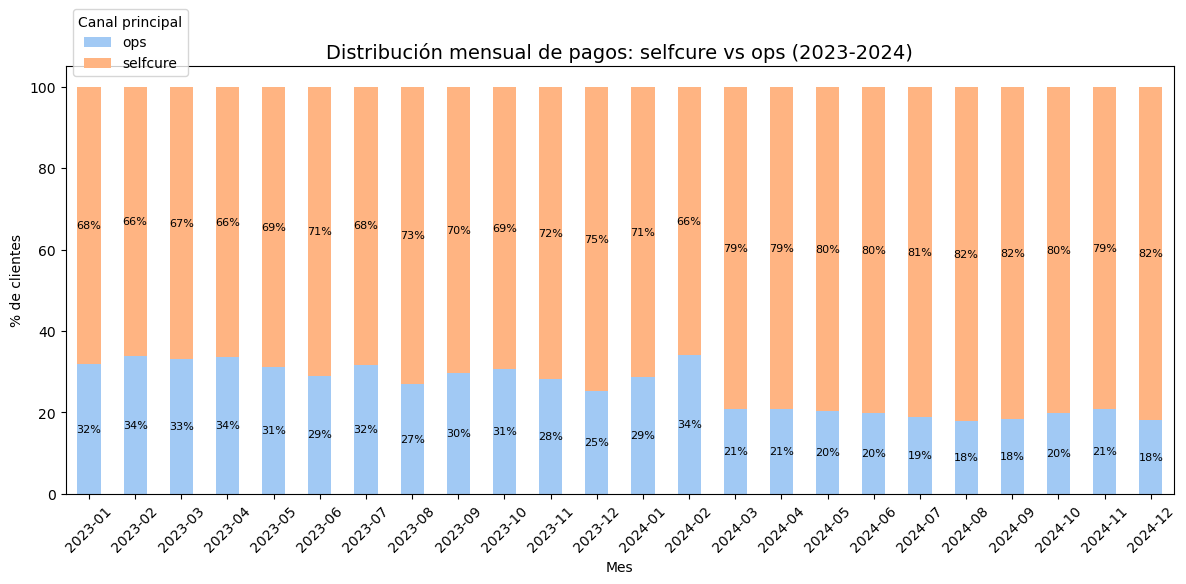

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'profile_created_at_local' es datetime
df3['fecha'] = pd.to_datetime(df3['profile_created_at_local'])

# Filtrar datos de 2023 y 2024
df_filtrado = df3[df3['fecha'].dt.year.isin([2023, 2024])].copy()

# Invertir nombres de columnas
df_filtrado['ops'] = df_filtrado['selfcure']
df_filtrado['selfcure'] = df_filtrado['Marcar']

# Canal principal
df_filtrado['main_channel'] = df_filtrado[['ops', 'selfcure']].idxmax(axis=1)
df_filtrado['main_channel'] = df_filtrado.apply(
    lambda row: 'sin_definir' if (row[['ops', 'selfcure']].fillna(0).sum() == 0) else row['main_channel'],
    axis=1
)

# Agrupar por mes y canal
df_filtrado['year_month'] = df_filtrado['fecha'].dt.to_period('M').astype(str)
grouped = df_filtrado.groupby(['year_month', 'main_channel']).size().unstack().fillna(0)

# Calcular porcentajes
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Colores pastel
pastel_colors = sns.color_palette("pastel", n_colors=len(grouped_percent.columns))

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
grouped_percent.plot(kind='bar', stacked=True, ax=ax, color=pastel_colors)

# Etiquetas de porcentaje
for i, (index, row) in enumerate(grouped_percent.iterrows()):
    bottom = 0
    for j, (col, value) in enumerate(row.items()):
        if value > 2:
            ax.text(i, bottom + value / 2, f"{value:.0f}%", ha='center', va='center', fontsize=8)
        bottom += value

# Título y etiquetas
ax.set_title('Distribución mensual de pagos: selfcure vs ops (2023-2024)', fontsize=14)
ax.set_ylabel('% de clientes')
ax.set_xlabel('Mes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Leyenda en la parte superior izquierda (fuera del gráfico)
ax.legend(title='Canal principal', bbox_to_anchor=(0, 1.15), loc='upper left', ncol=1)

plt.tight_layout()
plt.show()





In [21]:
# Renombrar para que refleje la inversión de nombres
df['ops'] = df['selfcure']  # Selfcure ahora representa los que pagan solos
df['selfcure'] = df['Marcar']  # Marcar representa los que requieren presión, es decir, 'ops'

# Crear la columna 'main_channel'
df['main_channel'] = df[['selfcure', 'ops']].idxmax(axis=1)

# Reemplazar con 'sin_definir' si ambos valores son 0 o NaN
df['main_channel'] = df.apply(
    lambda row: 'sin_definir' if (row[['selfcure', 'ops']].fillna(0).sum() == 0) else row['main_channel'],
    axis=1
)



In [22]:
print(df['main_channel'].value_counts())


sin_definir    1269682
selfcure        960852
ops             307799
Name: main_channel, dtype: int64


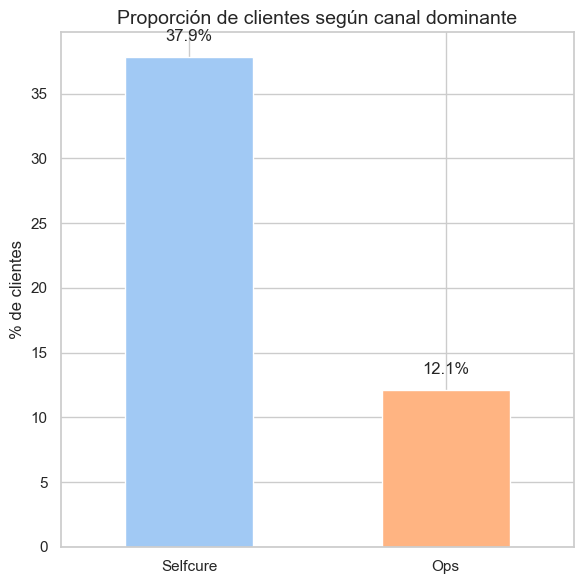

KeyError: 'customer_id'

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo pastel
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("pastel")

# GRÁFICO 1: Proporción de clientes por canal dominante
canal_counts = df['main_channel'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(6, 6))
canal_counts[['selfcure', 'ops']].plot(kind='bar', color=pastel_palette[:2], ax=ax)

for i, val in enumerate(canal_counts[['selfcure', 'ops']]):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=12)

ax.set_title('Proporción de clientes según canal dominante', fontsize=14)
ax.set_ylabel('% de clientes')
ax.set_xlabel('')
ax.set_xticklabels(['Selfcure', 'Ops'], rotation=0)

plt.tight_layout()
plt.show()

# GRÁFICO 2: Distribución de frecuencia mensual de pagos en ops
# Simulamos una columna que cuente cuántas veces cayó en ops por mes
# Si ya tienes una columna así, usa esa
# Supongamos que tienes un DataFrame mensual o lo generamos

# Aseguramos que hay una columna tipo fecha
df['fecha'] = pd.to_datetime(df['profile_created_at_local'])  # ajusta si el nombre de tu fecha es otro
df['año_mes'] = df['fecha'].dt.to_period('M')

# Filtrar solo clientes con 'ops' y contar cuántos meses diferentes cayeron en ops
ops_df = df[df['main_channel'] == 'ops']
recurrente_ops = ops_df.groupby('customer_id')['año_mes'].nunique()

# Agrupamos por número de meses que cayó en ops
recurrente_distribution = recurrente_ops.value_counts().sort_index()

fig, ax = plt.subplots(figsize=(7, 4))
recurrente_distribution.plot(kind='bar', color=pastel_palette[1], ax=ax)

for i, val in enumerate(recurrente_distribution):
    ax.text(i, val + 100, f'{val}', ha='center', va='bottom', fontsize=11)

ax.set_title('Frecuencia de meses en mora operativa (ops)', fontsize=14)
ax.set_xlabel('Meses en los que cayó en ops')
ax.set_ylabel('Número de clientes')

plt.tight_layout()
plt.show()


In [24]:
df.dtypes


global_person_id                                                             int64
full_name                                                                   object
date_of_birth                                                               object
age                                                                          int64
gender                                                                      object
city                                                                        object
city_code                                                                   object
state                                                                       object
postal_code                                                                 object
street                                                                      object
building                                                                    object
interior                                                                    object
neig

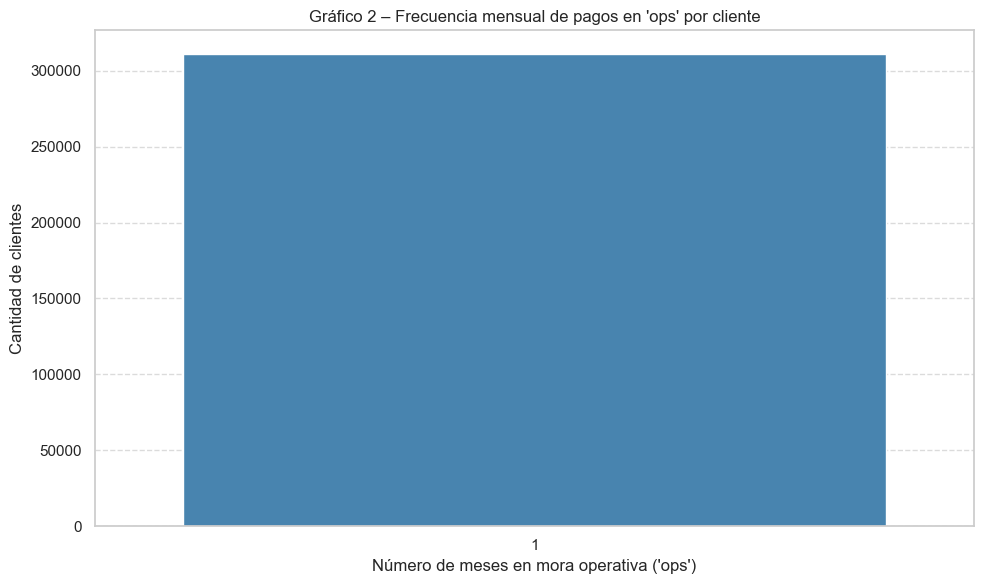

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Filtrar solo las filas donde el cliente tiene 'ops' positiva (mora operativa)
df_ops = df[df['ops'] > 0]

# Paso 2: Contar cuántos meses diferentes cada cliente estuvo en mora operativa
frecuencia_ops = df_ops.groupby('global_person_id')['año_mes'].nunique().reset_index(name='frecuencia_mora')

# Paso 3: Contar cuántos clientes hay por cada frecuencia de mora (1, 2, 3, etc.)
distribucion = frecuencia_ops['frecuencia_mora'].value_counts().sort_index().reset_index()
distribucion.columns = ['frecuencia_mora_mensual', 'cantidad_clientes']

# Paso 4: Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=distribucion, x='frecuencia_mora_mensual', y='cantidad_clientes', palette='Blues_d')
plt.title("Gráfico 2 – Frecuencia mensual de pagos en 'ops' por cliente")
plt.xlabel("Número de meses en mora operativa ('ops')")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
equivalencias_estado = {
    'mex': 'MEX', 'MEX': 'MEX',
    'cmx': 'CDMX', 'cdmx': 'CDMX', 'CMX': 'CDMX',
    'jal': 'JAL', 'JAL': 'JAL',
    'ver': 'VER', 'VER': 'VER',
    'pue': 'PUE', 'PUE': 'PUE',
    'gua': 'GTO', 'gto': 'GTO', 'GUA': 'GTO',
    'nle': 'NLE', 'nl': 'NLE', 'NLE': 'NLE',
    'chp': 'CHP', 'chis': 'CHP', 'CHP': 'CHP',
    'mic': 'MICH', 'mich': 'MICH',
    'oax': 'OAX', 'OAX': 'OAX',
    'bcn': 'BCN', 'bc': 'BCN', 'BCN': 'BCN',
    'chh': 'CHIH', 'chih': 'CHIH',
    'gro': 'GRO', 'GRO': 'GRO',
    'tam': 'TAM', 'tamp': 'TAM', 'TAM': 'TAM',
    'coa': 'COA', 'coah': 'COA', 'COA': 'COA',
    'hid': 'HID', 'hgo': 'HID', 'HID': 'HID',
    'sin': 'SIN', 'SIN': 'SIN',
    'son': 'SON', 'SON': 'SON',
    'slp': 'SLP', 'SLP': 'SLP',
    'tab': 'TAB', 'TAB': 'TAB',
    'que': 'QRO', 'qro': 'QRO', 'QUE': 'QRO',
    'yuc': 'YUC', 'YUC': 'YUC',
    'mor': 'MOR',
    'roo': 'ROO', 'qroo': 'ROO', 'ROO': 'ROO',
    'dur': 'DUR', 'dgo': 'DUR', 'DUR': 'DUR',
    'zac': 'ZAC',
    'agu': 'AGS', 'ags': 'AGS',
    'tla': 'TLAX', 'tlax': 'TLAX',
    'nay': 'NAY',
    'cam': 'CAM', 'camp': 'CAM', 'CAM': 'CAM',
    'bcs': 'BCS', 'BCS': 'BCS',
    'col': 'COL', 'COL': 'COL'
}


In [27]:
df_states = df.groupby('state')['global_person_id'].nunique().reset_index(name='count')


In [28]:
df_states = df['state'].str.lower().map(equivalencias_estado)


In [29]:
poblacion_dict = {
    'MEX': 16992418, 'CDMX': 9209944, 'JAL': 8348151, 'VER': 8062579, 'PUE': 6583278, 
    'GTO': 6166934, 'NLE': 5784442, 'CHP': 5543828, 'MICH': 4748846, 'OAX': 4132148, 
    'BCN': 3769020, 'CHIH': 3741869, 'GRO': 3540685, 'TAM': 3527735, 'COA': 3146771, 
    'HID': 3082841, 'SIN': 3026943, 'SON': 2944840, 'SLP': 2822255, 'TAB': 2402598, 
    'QRO': 2368467, 'YUC': 2320898, 'MOR': 1971520, 'ROO': 1857985, 'DUR': 1832650, 
    'ZAC': 1622138, 'AGS': 1425607, 'TLAX': 1342977, 'NAY': 1235456, 'CAM': 928363, 
    'BCS': 798447, 'COL': 731391
}

df_poblacion = pd.DataFrame(list(poblacion_dict.items()), columns=['state', 'poblacion'])


In [30]:
df_states= df_states.merge(df_poblacion, on='state', how='left')


AttributeError: 'Series' object has no attribute 'merge'

In [31]:
df_states['clientes_por_10k'] = (df_states['count'] / df_states['poblacion']) * 10000


KeyError: 'count'

NameError: name 'ticker' is not defined

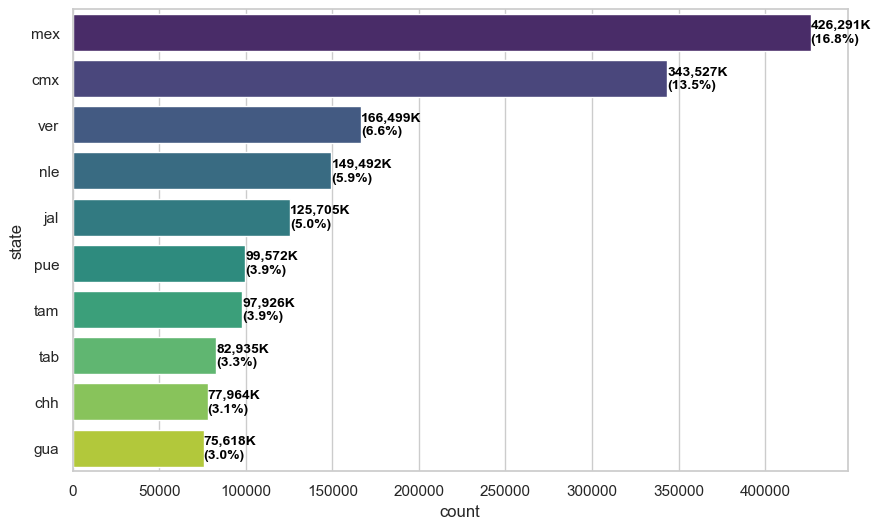

In [32]:
# Contar clientes por estado
state_counts = df['state'].value_counts().head(10)

# Calcular el total de clientes
total_clientes = df['global_person_id'].nunique()

# Convertir a DataFrame para facilitar cálculos
df_states = state_counts.reset_index()
df_states.columns = ['state', 'count']
df_states['percentage'] = (df_states['count'] / total_clientes) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_states, x='count', y='state', palette='viridis')

# Agregar etiquetas con valores nominales y porcentaje
for p in ax.patches:
    value = p.get_width()
    percentage = (value / total_clientes) * 100
    formatted_value = f'{value:,.0f}K' if value >= 1000 else f'{value:,}'
    ax.annotate(f'{formatted_value}\n({percentage:.1f}%)',  
                (p.get_width(), p.get_y() + p.get_height()/2),  
                ha='left', va='center', fontsize=10, color='black', weight='bold')

# Formato del eje X
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_k))

plt.xlabel("Número de Clientes")
plt.ylabel("Estado")
plt.title("Top 10 Estados con Más Clientes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [33]:
# Ordenar de mayor a menor por clientes por cada 10,000 habitantes
df_states = df_states.sort_values(by='clientes_por_10k', ascending=False)

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_states, x='clientes_por_10k', y='state', palette='viridis')

# Agregar etiquetas
for p in ax.patches:
    value = p.get_width()
    ax.annotate(f'{value:.1f}',  
                (p.get_width(), p.get_y() + p.get_height()/2),  
                ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.xlabel("Clientes por cada 10,000 habitantes")
plt.ylabel("Estado")
plt.title("Top 10 Estados con Mayor Penetración de Clientes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



KeyError: 'clientes_por_10k'

In [34]:


# Definir la lista de columnas que quieres extraer
columns_to_extract = [
    'global_person_id', 
    'state',
    'municipal',
    'gender' ,
    'inbound', 
    'outbound', 
    'whatsapp', 
    'tala_app', 
    'inbound_payment', 
    'outbound_payment', 
    'whatsapp_payment', 
    'tala_app_payment', 
    'selfcure',                                                              
    'monto_pago',
    'payment', 
    'promise', 
    'plan', 
    'Marcar', 
    'age_group', 
    'main_channel',                                                                                                                
    'income_segment', 
    'created_year', 
    'updated_year', 
    'First_loan_year', 
    'credit_score_range', 
    'disbursed_loans_range', 
    'disbursed_paid_loans_range', 
    'payment_rate', 
    'payment_rate_range', 
    'submitted_loan_applications_range', 
    'repeat_loan_applications_range', 
    'months_from_first_loan_disbursed_range', 
    'days_from_first_loan_disbursed_range', 
    'first_repayment_year', 
    'last_repayment_year', 
    'months_from_last_repayment_range', 
    'days_from_last_repayment_range',
    'latest_kyc_id_type',                                                       
'latest_kyc_id_number',                                                      
'profile_created_at_local',                                          
'profile_updated_at_local',                                           
'first_loan_credit_score',                                                    
'first_loan_self_reported_total_monthly_income_local',                       
'first_loan_disbursed_at_local',                                       
'is_referred_by_user',                                                          
'acquisition_source_for_decisioning',                                         
'current_count_of_disbursed_loans',                                             
'current_count_of_disbursed_paid_loans',                                       
'current_count_of_disbursed_loans_with_outstanding_balance',                   
'current_count_of_submitted_loan_applications',                                
'current_count_of_first_loan_applications',                                    
'current_count_of_repeat_loan_applications',                                   
'count_of_months_from_first_loan_disbursed_to_current_date',                   
'count_of_days_from_first_loan_disbursed_to_current_date',                     
'days_from_signup_to_first_loan_disbursed',                                   
'predicted_crm_12month',                                                     
'predicted_crm_18month',                                                   
'predicted_ltv_12month',                                                     
'predicted_ltv_18month',                                                      
'predicted_ltv_50month',                                                     
'prediction_strategy',                                                        
'first_repayment_transaction_at_local',                                
'last_repayment_transaction_at_local',                                 
'months_from_first_repayment_transaction_at_local_to_current_date',           
'days_from_first_repayment_transaction_at_local_to_current_date',             
'months_from_last_repayment_transaction_at_local_to_current_date',            
'days_from_last_repayment_transaction_at_local_to_current_date' ,
'llamada',                                                              
'rpc'
]

# Extraer las columnas en un nuevo DataFrame
df2 = df3[columns_to_extract]

df2


,global_person_id,state,municipal,gender,inbound,outbound,whatsapp,tala_app,inbound_payment,outbound_payment,...,predicted_ltv_50month,prediction_strategy,first_repayment_transaction_at_local,last_repayment_transaction_at_local,months_from_first_repayment_transaction_at_local_to_current_date,days_from_first_repayment_transaction_at_local_to_current_date,months_from_last_repayment_transaction_at_local_to_current_date,days_from_last_repayment_transaction_at_local_to_current_date,llamada,rpc
0,844424941459770,pue,Zapotitlan,m,0.0,0.0,0.0,0.0,0.0,0.0,...,59.90,CREDIT_12.0,NaT,NaT,NaN,NaN,NaN,NaN,143.0,143.0
1,844424943138400,cmx,Santa Martha,f,0.0,0.0,0.0,0.0,0.0,0.0,...,80.97,CREDIT_13.0,2024-10-25 18:29:22.328577,2025-04-01 00:36:44.916755,7.0,205.0,1.0,47.0,113.0,113.0
3,844424939211416,oax,santo domingo tehuantepec,m,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.75,CREDIT_8.0,NaT,NaT,NaN,NaN,NaN,NaN,94.0,94.0
4,844424942608259,tam,altamira,f,0.0,0.0,0.0,0.0,0.0,0.0,...,46.22,CREDIT_12.0,NaT,NaT,NaN,NaN,NaN,NaN,98.0,98.0
5,844424944242138,col,colima,m,0.0,0.0,0.0,0.0,0.0,0.0,...,54.49,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN,201.0,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2538326,844424945527681,mex,tecamac,m,NaN,NaN,NaN,NaN,NaN,NaN,...,73.75,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN,0.0,0.0
2538327,844424939980428,cmx,xochimilco,m,0.0,1.0,0.0,0.0,0.0,0.0,...,32.95,CREDIT_11.0,NaT,NaT,NaN,NaN,NaN,NaN,263.0,263.0
2538328,844424943965660,pue,Tepanco de Lopez,m,0.0,0.0,0.0,0.0,0.0,0.0,...,64.79,CREDIT_13.0,NaT,NaT,NaN,NaN,NaN,NaN,258.0,258.0
2538329,844424940287528,coa,acuña,f,0.0,0.0,0.0,0.0,0.0,0.0,...,70.58,CREDIT_11.0,NaT,NaT,NaN,NaN,NaN,NaN,274.0,274.0


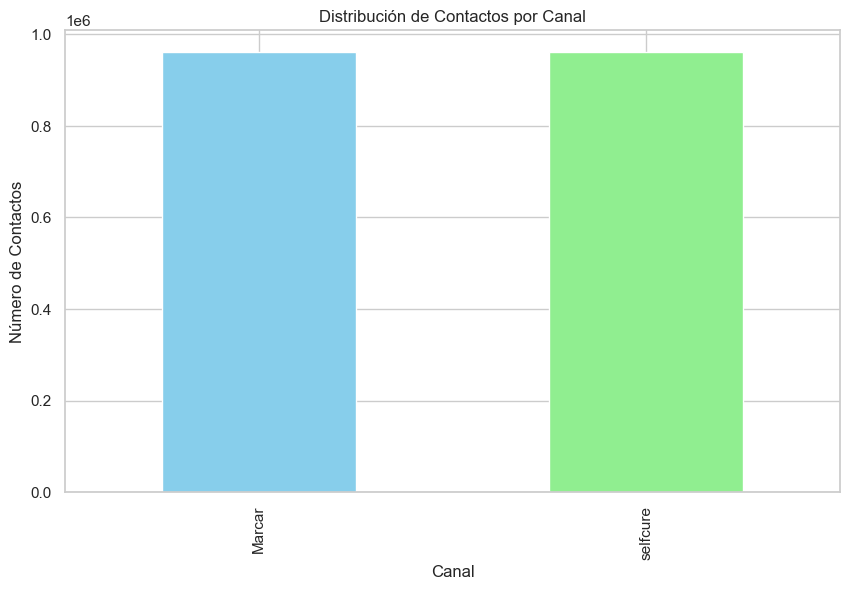

In [35]:
import matplotlib.pyplot as plt
# Crear gráfico de barras para la distribución de contactos por canal
canal_columns = ['Marcar','selfcure']

df[canal_columns].sum().plot(kind='bar', figsize=(10,6), color=['skyblue', 'lightgreen', 'coral', 'lightpink'])
plt.title('Distribución de Contactos por Canal')
plt.xlabel('Canal')
plt.ylabel('Número de Contactos')
plt.show()



/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/1421087713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['first_repayment_transaction_at_local'] = pd.to_datetime(df3['first_repayment_transaction_at_local'])


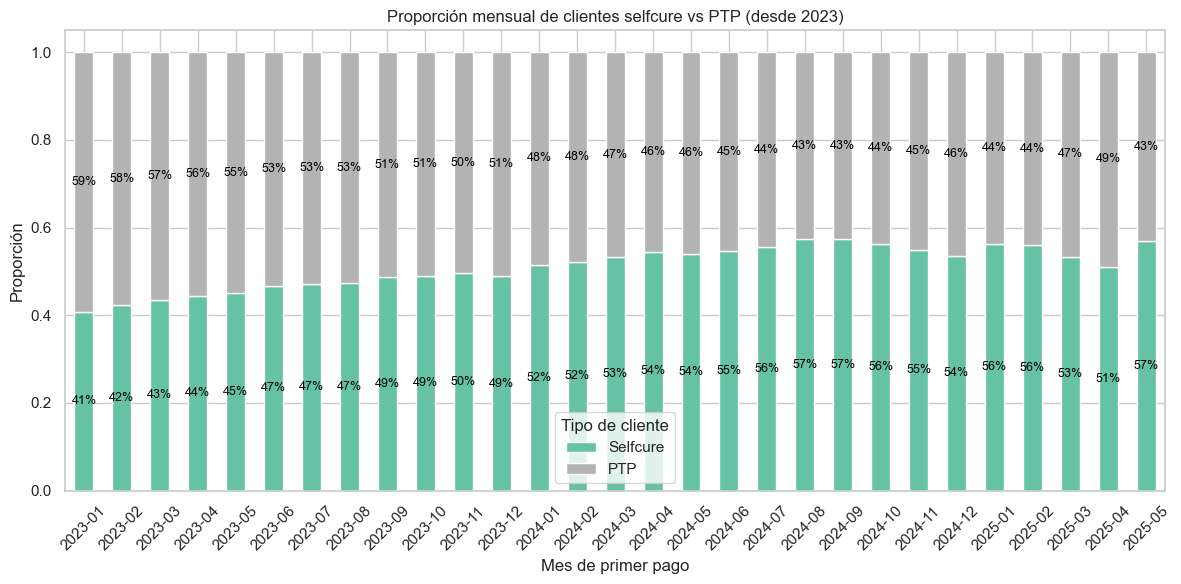

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Aseguramos formato datetime
df3['first_repayment_transaction_at_local'] = pd.to_datetime(df3['first_repayment_transaction_at_local'])

# Filtramos desde enero 2023
df_filtrado = df3[df3['first_repayment_transaction_at_local'] >= '2023-01-01'].copy()

# Mes de pago
df_filtrado['mes_pago'] = df_filtrado['first_repayment_transaction_at_local'].dt.to_period('M')

# Agrupamos y calculamos proporciones
df_temp = df_filtrado.groupby(['mes_pago', 'Marcar']).size().unstack().fillna(0)
df_temp.columns = ['ptp', 'selfcure']
df_temp['total'] = df_temp['ptp'] + df_temp['selfcure']
df_temp['pct_selfcure'] = df_temp['selfcure'] / df_temp['total']
df_temp['pct_ptp'] = df_temp['ptp'] / df_temp['total']

# Gráfico
ax = df_temp[['pct_selfcure', 'pct_ptp']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set2'
)

# Etiquetas de porcentaje sobre las barras
for i, (index, row) in enumerate(df_temp.iterrows()):
    total = row['total']
    pct_s = row['pct_selfcure']
    pct_p = row['pct_ptp']
    ax.text(i, pct_s / 2, f"{pct_s:.0%}", ha='center', va='center', color='black', fontsize=9)
    ax.text(i, pct_s + (pct_p / 2), f"{pct_p:.0%}", ha='center', va='center', color='black', fontsize=9)

# Ajustes del gráfico
plt.title('Proporción mensual de clientes selfcure vs PTP (desde 2023)')
plt.xlabel('Mes de primer pago')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(['Selfcure', 'PTP'], title='Tipo de cliente')
plt.tight_layout()
plt.show()



In [37]:
df.dtypes

global_person_id                                                             int64
full_name                                                                   object
date_of_birth                                                               object
age                                                                          int64
gender                                                                      object
city                                                                        object
city_code                                                                   object
state                                                                       object
postal_code                                                                 object
street                                                                      object
building                                                                    object
interior                                                                    object
neig

/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/1110199053.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_percent['percent'] = df_percent.groupby('gender')['count'].apply(lambda x: 100 * x / x.sum())


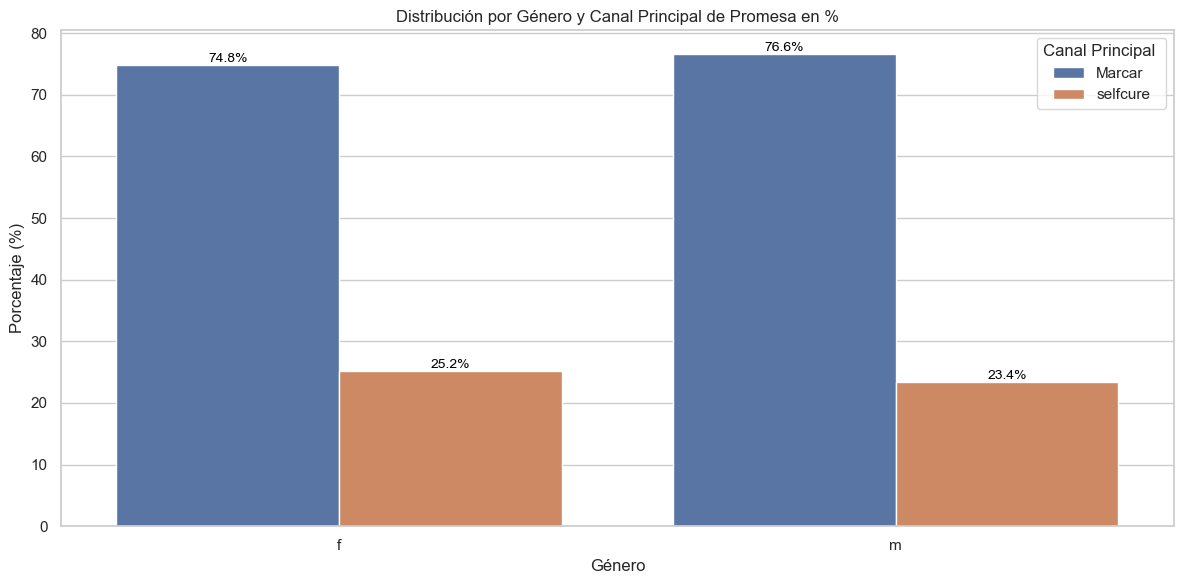

In [38]:
# Calcular la distribución en porcentaje
df_percent = df3.groupby(['gender', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('gender')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='gender', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por Género y Canal Principal de Promesa en %')
plt.xlabel('Género')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Canal Principal ')

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/1700863251.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_percent['percent'] = df_percent.groupby('age_group')['count'].apply(lambda x: 100 * x / x.sum())


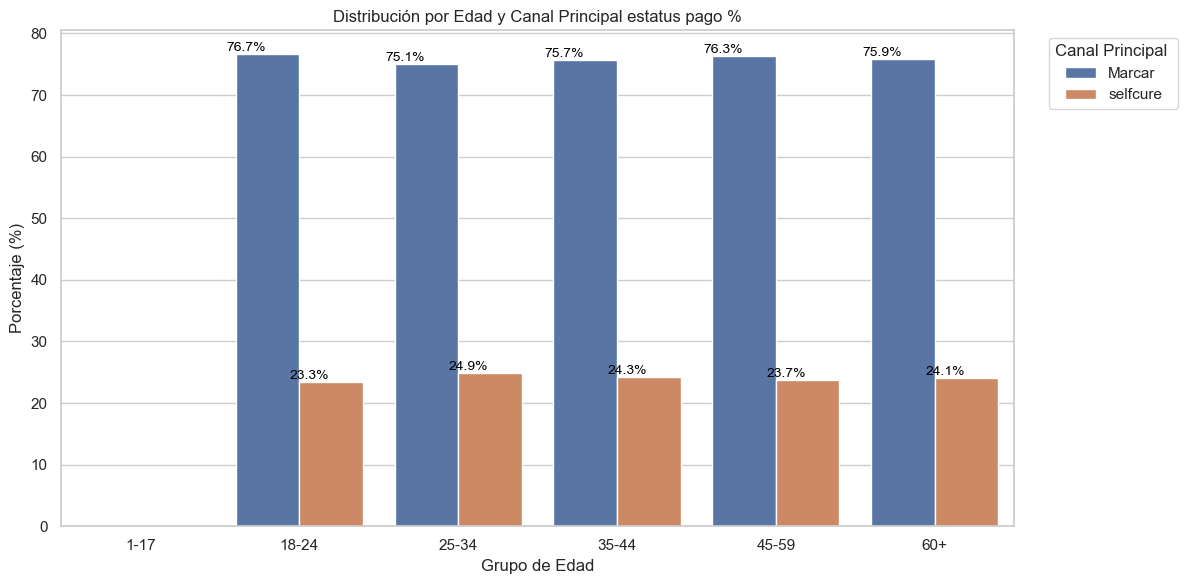

In [39]:
# Calcular la distribución en porcentaje
df_percent = df2.groupby(['age_group', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('age_group')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='age_group', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por Edad y Canal Principal estatus pago %')
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal ', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/2620845541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['main_channel'] = df2['main_channel'].replace('Marcar', 'ops')
/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/2620845541.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_percent['percent'] = df_percent.groupby('income_segment')['count'].apply(lambda 

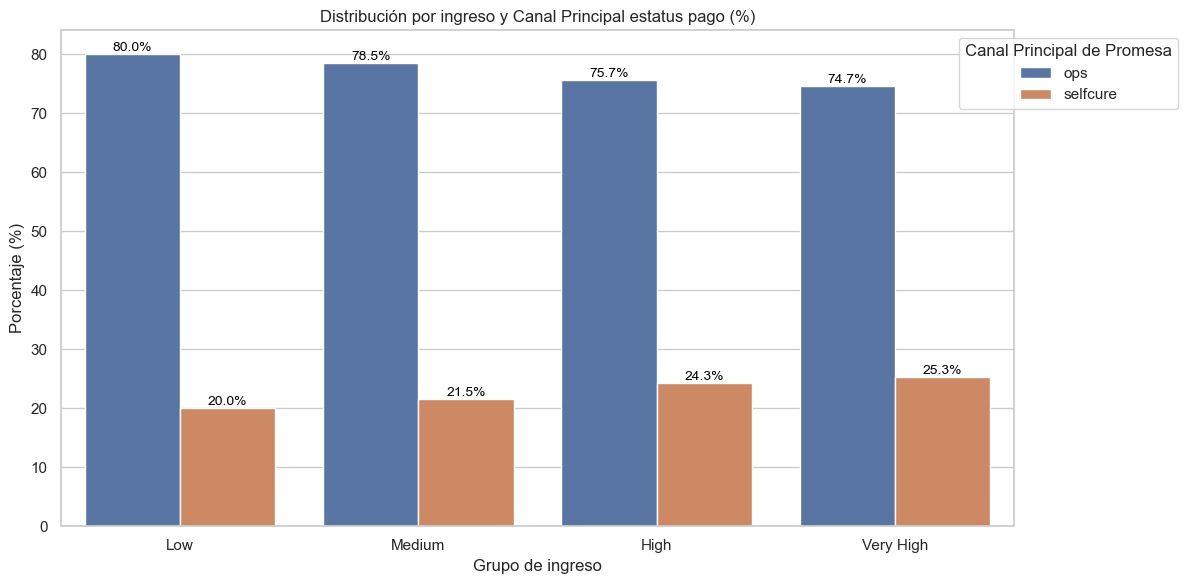

In [40]:
# Reemplazar el valor 'Marcar' por 'ops' en la columna main_channel
df2['main_channel'] = df2['main_channel'].replace('Marcar', 'ops')

# Agrupar y calcular porcentajes
df_percent = df2.groupby(['income_segment', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('income_segment')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='income_segment', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por ingreso y Canal Principal estatus pago (%)')
plt.xlabel('Grupo de ingreso')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal de Promesa', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()
plt.show()


/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/68483191.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_percent['percent'] = df_percent.groupby('created_year')['count'].apply(lambda x: 100 * x / x.sum())


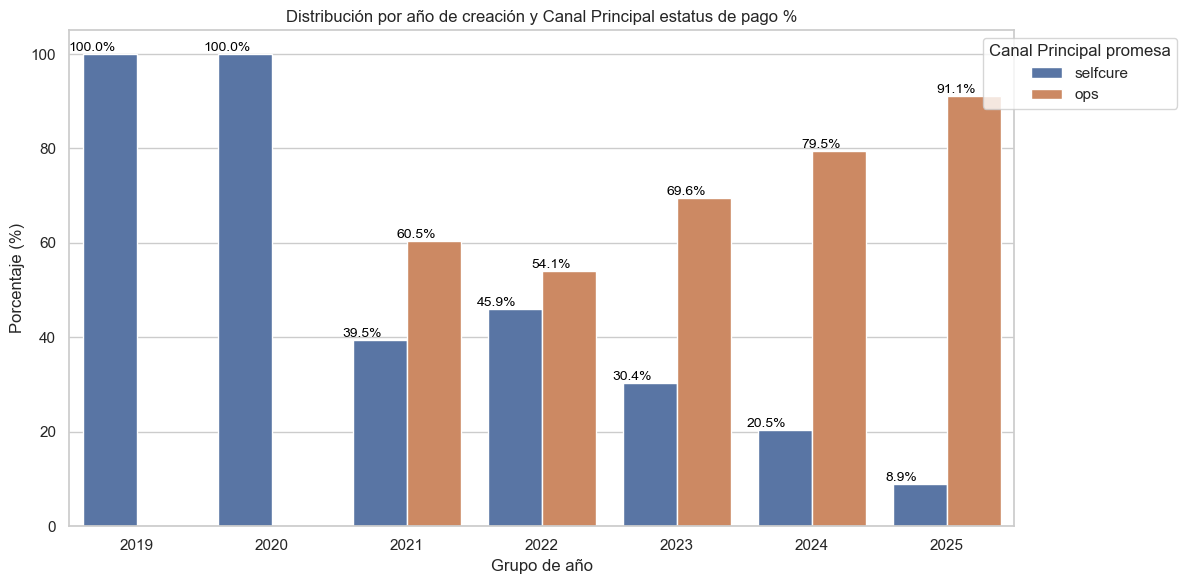

In [41]:
df_percent = df2.groupby(['created_year', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('created_year')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='created_year', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por año de creación y Canal Principal estatus de pago %')
plt.xlabel('Grupo de año')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal promesa', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/3215555359.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_percent['percent'] = df_percent.groupby('credit_score_range')['count'].apply(lambda x: 100 * x / x.sum())


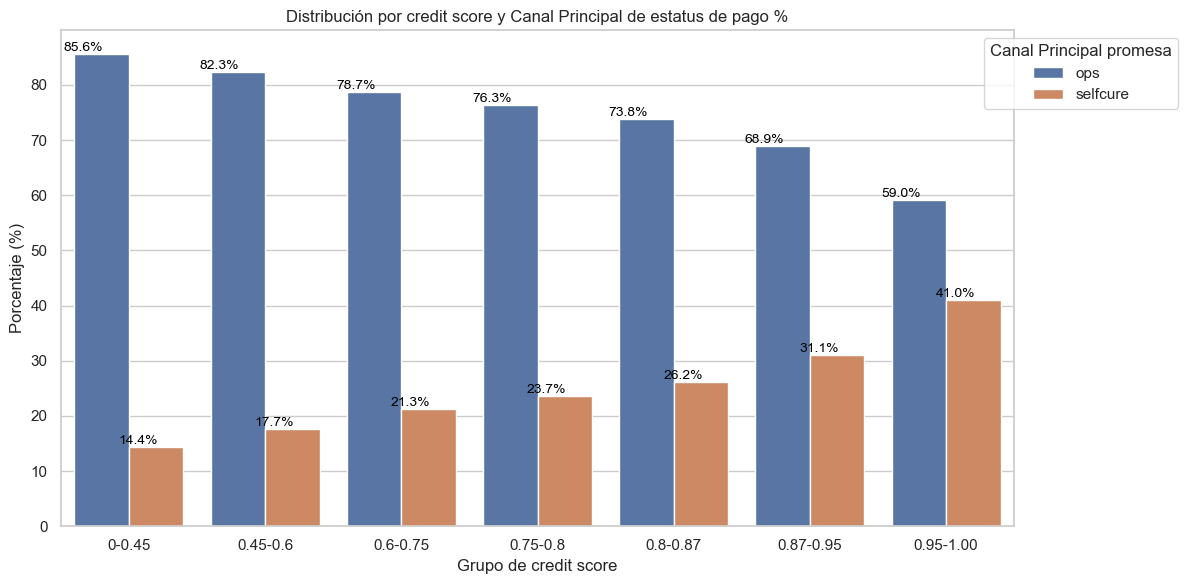

In [42]:
df_percent = df2.groupby(['credit_score_range', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('credit_score_range')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='credit_score_range', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por credit score y Canal Principal de estatus de pago %')
plt.xlabel('Grupo de credit score')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal promesa', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

/var/folders/72/y2m846m500v_wzkkglbhb5p00000gp/T/ipykernel_5362/2466869051.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_percent['percent'] = df_percent.groupby('disbursed_loans_range')['count'].apply(lambda x: 100 * x / x.sum())


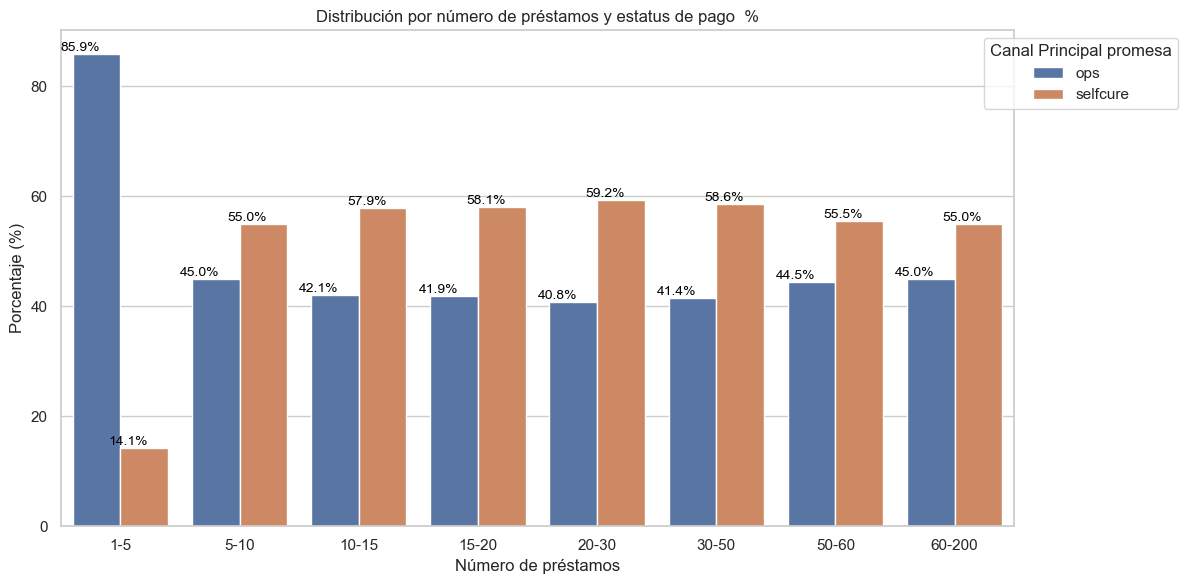

In [43]:
df_percent = df2.groupby(['disbursed_loans_range', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('disbursed_loans_range')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='disbursed_loans_range', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por número de préstamos y estatus de pago  %')
plt.xlabel('Número de préstamos')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal promesa', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

In [ ]:
df_percent = df2.groupby(['disbursed_paid_loans_range', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('disbursed_paid_loans_range')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='disbursed_paid_loans_range', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por numero de prestamos pagados y Canal Principal estatus de pagos %')
plt.xlabel('Numero de prestamos')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal tasa pagos', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

In [ ]:
df_percent = df2.groupby(['payment_rate_range', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('payment_rate_range')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='payment_rate_range', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por tasa de pago y estatus pago')
plt.xlabel('tasa de pagos')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal promesa', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

In [ ]:
df_percent = df2.groupby(['days_from_first_loan_disbursed_range', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('days_from_first_loan_disbursed_range')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='days_from_first_loan_disbursed_range', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por dias del primer prestamo y  estatus pago %')
plt.xlabel('dias del primer prestamos')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal promesas ', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

In [ ]:
df_percent = df2.groupby(['days_from_last_repayment_range', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('days_from_last_repayment_range')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='days_from_last_repayment_range', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por dias del primer prestamo y estatus pago %')
plt.xlabel('dias del ultimo pago de  prestamo')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal  promesas ', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

In [ ]:
# Crear un diccionario con la clasificación de los estados por regiones
region_mapping = {
    'bcn': 'Norte', 'bc': 'Norte', 'bcs': 'Norte', 'chh': 'Norte', 'chih': 'Norte', 
    'coa': 'Norte', 'dur': 'Norte', 'dgo': 'Norte', 'nle': 'Norte', 'nl': 'Norte', 
    'son': 'Norte', 'tam': 'Norte', 'tamp': 'Norte', 'zac': 'Norte', 'sin': 'Norte',
    'agu': 'Centro-Norte', 'gua': 'Centro-Norte', 'gto': 'Centro-Norte', 
    'que': 'Centro-Norte', 'qro': 'Centro-Norte', 'slp': 'Centro-Norte',
    'cmx': 'Centro', 'cdmx': 'Centro', 'mex': 'Centro', 'hid': 'Centro', 'hgo': 'Centro', 
    'mor': 'Centro', 'pue': 'Centro', 'tla': 'Centro', 'tlax': 'Centro',
    'col': 'Occidente', 'jal': 'Occidente', 'mic': 'Occidente', 'mich': 'Occidente', 
    'nay': 'Occidente',
    'gro': 'Sur', 'oax': 'Sur',
    'cam': 'Sureste', 'chp': 'Sureste', 'chis': 'Sureste', 'roo': 'Sureste', 
    'qroo': 'Sureste', 'tab': 'Sureste', 'ver': 'Sureste', 'yuc': 'Sureste'
}

# Agregar una nueva columna 'region' al DataFrame basada en el mapeo de estados
df2['region'] = df2['state'].map(region_mapping)




In [ ]:
#Norte: Baja California (bcn), Baja California Sur (bcs), Chihuahua (chh, chih), Coahuila (coa), Durango (dur, dgo), Nuevo León (nle, nl), Sonora (son), Tamaulipas (tam, tamp), Zacatecas (zac), Sinaloa (sin).

#Centro-Norte: Aguascalientes (agu), Guanajuato (gua, gto), Querétaro (que, qro), San Luis Potosí (slp).

#Centro: Ciudad de México (cmx, cdmx), Estado de México (mex), Hidalgo (hid, hgo), Morelos (mor), Puebla #(pue), Tlaxcala (tla, tlax).

#Occidente: Colima (col), Jalisco (jal), Michoacán (mic, mich), Nayarit (nay).

#Sur: Guerrero (gro), Oaxaca (oax).

#Sureste: Campeche (cam), Chiapas (chp, chis), Quintana Roo (roo, qroo), Tabasco (tab), Veracruz (ver), Yucatán (yuc).

In [ ]:
df_percent = df2.groupby(['region', 'main_channel']).size().reset_index(name='count')
df_percent['percent'] = df_percent.groupby('region')['count'].apply(lambda x: 100 * x / x.sum())

# Graficar los porcentajes
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_percent, x='region', y='percent', hue='main_channel')

# Añadir título y etiquetas
plt.title('Distribución por region y estatus de pago')
plt.xlabel('Distribución por region estatus de pago')
plt.ylabel('Porcentaje (%)')

# Ajustar la leyenda para que no se sobreponga al gráfico
plt.legend(title='Canal Principal promesa  ', loc='upper right', bbox_to_anchor=(1.18, 1))

# Agregar etiquetas con los valores en porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 6., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Mostrar gráfico
plt.tight_layout()  # Ajustar el layout
plt.show()

In [ ]:
df2.dtypes

In [ ]:
df2 = df2[df2['credit_score_range'].notnull()]
df2= df2[df2['state'].notnull()]
df2= df2[df2['age_group'].notnull()]
df2= df2[df2['income_segment'].notnull()]
df2= df2[df2['payment'].notnull()]
df2= df2[df2['disbursed_paid_loans_range'].notnull()]
df2= df2[df2['days_from_last_repayment_range'].notnull()]
df2= df2[df2['first_repayment_year'].notnull()]
df2= df2[df2['months_from_first_loan_disbursed_range'].notnull()]

if 'repeat_loan_applications_range' in df2.columns:
    df2['repeat_loan_applications_range'].fillna('1-5', inplace=True)


In [ ]:
df2= df2[df2['predicted_crm_12month'].notnull()]
df2= df2[df2['predicted_ltv_12month'].notnull()]
df2= df2[df2['region'].notnull()]
df2= df2[df2['latest_kyc_id_type'].notnull()]

In [ ]:
df2.isnull().sum()

In [ ]:
df2

In [ ]:
# Calcular las proporciones de cada clase en 'main_channel'
proporciones = df2['main_channel'].value_counts(normalize=True)

# Mostrar las proporciones
print(proporciones)

In [ ]:
import matplotlib.pyplot as plt
# Crear gráfico de barras para la distribución de contactos por canal
canal_columns = ['Marcar','selfcure']

df2[canal_columns].sum().plot(kind='bar', figsize=(10,6), color=['skyblue', 'lightgreen', 'coral', 'lightpink'])
plt.title('Distribución de Contactos por Canal')
plt.xlabel('Canal')
plt.ylabel('Número de Contactos')
plt.show()

In [ ]:
# Seleccionar características relevantes para el modelo
features = [
     'created_year',
  
]


In [ ]:
#'state',--->  0.0 precision mal predictor
#'gender',--->  0.0 precision mal predictor

In [ ]:
'state', 
    'gender', 
    'age_group', 
    'income_segment', 
    'created_year', 
    'updated_year', 
    'First_loan_year', 
    'credit_score_range', 
    'disbursed_loans_range', 
    'disbursed_paid_loans_range', 
    'payment_rate', 
    'submitted_loan_applications_range', 
    'repeat_loan_applications_range', 
    'months_from_first_loan_disbursed_range', 
    'days_from_first_loan_disbursed_range', 
    'first_repayment_year', 
    'last_repayment_year', 
    'months_from_last_repayment_range', 
    'days_from_last_repayment_range'

In [ ]:
df2.dtypes


In [ ]:
features = [
'state',       
'municipal',                                                              
'gender',                                                               
'main_channel',                                                        
'income_segment',                                                       
'created_year',                                                           
'updated_year',                                                      
'First_loan_year',                                                   
'credit_score_range',                                                   
'disbursed_loans_range',                                                 
'disbursed_paid_loans_range',                                           
'payment_rate',                                                       
'payment_rate_range',                                                  
'submitted_loan_applications_range',                                   
'repeat_loan_applications_range',                                        
'months_from_first_loan_disbursed_range',                               
'days_from_first_loan_disbursed_range',                                
'first_repayment_year',                                                  
'last_repayment_year',                                                 
'months_from_last_repayment_range',                               
'days_from_last_repayment_range',                                      
'latest_kyc_id_type',                                                
'latest_kyc_id_number',                                                
'profile_created_at_local',                                              
'profile_updated_at_local',                                             
'first_loan_credit_score',                                           
'first_loan_self_reported_total_monthly_income_local',                   
'first_loan_disbursed_at_local',                                      
'is_referred_by_user',                                               
'acquisition_source_for_decisioning',                                
'current_count_of_disbursed_loans',                                        
'current_count_of_disbursed_paid_loans',                                   
'current_count_of_disbursed_loans_with_outstanding_balance',               
'current_count_of_submitted_loan_applications',                       
'current_count_of_first_loan_applications',                             
'current_count_of_repeat_loan_applications',                             
'count_of_months_from_first_loan_disbursed_to_current_date',              
'count_of_days_from_first_loan_disbursed_to_current_date',                 
'days_from_signup_to_first_loan_disbursed',                               
'predicted_crm_12month' ,                                                 
'predicted_crm_18month',                                               
'predicted_ltv_12month',                                               
'predicted_ltv_18month',                                               
'predicted_ltv_50month',                                            
'prediction_strategy',                                                     
'first_repayment_transaction_at_local',                                    
'last_repayment_transaction_at_local',                                     
'months_from_first_repayment_transaction_at_local_to_current_date',        
'days_from_first_repayment_transaction_at_local_to_current_date' ,         
'months_from_last_repayment_transaction_at_local_to_current_date',        
'days_from_last_repayment_transaction_at_local_to_current_date',
'rpc',
'llamada'
]

In [ ]:
df2.dtypes

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import gc

# Definir los segmentos
segment_size = 5  # Tamaño del segmento
segments = [features[i:i + segment_size] for i in range(0, len(features), segment_size)]

# Lista para almacenar los resultados
results_list = []

# Iterar sobre cada segmento
for segment in segments:
    print(f"Evaluando segmento: {segment}")
    for column in segment:
        try:
            # Usar un subconjunto de los datos si es necesario
            sample_df = df2.sample(frac=0.1, random_state=42)  # Usa el 10% de los datos
            X = pd.get_dummies(sample_df[[column]], drop_first=True)  # Codificar la variable
            y = np.where(sample_df['main_channel'] == 'selfcure', 0, 1)  # Variable objetivo
            
            # Dividir el conjunto de datos en entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            
            # Modelo de árbol de decisión
            dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=20, 
                                              random_state=42, class_weight='balanced')  # Agregar class_weight
            dt_model.fit(X_train, y_train)  # Entrenar el modelo en el conjunto de entrenamiento
            accuracy = dt_model.score(X_test, y_test)  # Evaluar el modelo en el conjunto de prueba

            # Obtener el reporte de clasificación
            y_pred = dt_model.predict(X_test)
            class_report = classification_report(y_test, y_pred, output_dict=True)
            
            # Almacenar precisión por variable y reportes
            results_list.append({
                "Variable": column,
                "Precisión (0)": class_report['0']['precision'],
                "Precisión (1)": class_report['1']['precision'],
                "F1-Score (0)": class_report['0']['f1-score'],
                "F1-Score (1)": class_report['1']['f1-score'],
                "Recall (0)": class_report['0']['recall'],
                "Recall (1)": class_report['1']['recall'],
                "Precisión total": accuracy
            })
            
        except Exception as e:
            print(f"Error con la variable {column}: {e}")
        
        finally:
            # Liberar memoria
            del X
            gc.collect()

# Convertir los resultados en un DataFrame de pandas
results_df = pd.DataFrame(results_list)

# Ordenar el DataFrame por precisión total
results_df_sorted = results_df.sort_values(by="Precisión total", ascending=False)

# Mostrar los resultados en formato tabla
print(results_df_sorted)


In [ ]:
results_df_sorted

In [ ]:
results_df_sorted.dtypes

In [ ]:
results_df_sorted2=results_df_sorted[['Variable', 'Precisión total']]
results_df_sorted2

In [ ]:
print(results_df_sorted.columns.tolist())

In [ ]:
# Renombrar columnas
results_df_sorted = results_df_sorted.rename(columns={
    'Variable': 'Variable',
    'Precisión (0)': 'Precision_0',
    'Precisión (1)': 'Precision_1',
    'F1-Score (0)': 'F1_Score_0',
    'F1-Score (1)': 'F1_Score_1',
    'Recall (0)': 'Recall_0',
    'Recall (1)': 'Recall_1',
    'Precisión total': 'Total_Precision'
})

# Verificar cambios
print(results_df_sorted.columns)

In [ ]:
results_df_sorted

In [ ]:
# Filtrar el DataFrame para excluir 'main_channel'
results_df_sorted_f = results_df_sorted[results_df_sorted['Variable'] != 'main_channel']

# Mostrar el DataFrame actualizado
print(results_df_sorted_f)

In [ ]:
def select_variables(df2, recall_threshold=0.4, f1_threshold=0.4):
    selected_variables = []

    # Iterar sobre cada fila del DataFrame
    for index, row in df2.iterrows():
        # Acceder a los valores en las columnas correspondientes
        recall_0 = row['Recall_0']
        recall_1 = row['Recall_1']
        f1_score_0 = row['F1_Score_0']
        f1_score_1 = row['F1_Score_1']
        
        # Verificar si la variable contiene '_range' y si cumple con los criterios de selección
        if ('_range' not in row['Variable'] and
            recall_0 >= recall_threshold and recall_1 >= recall_threshold and
            f1_score_0 >= f1_threshold and f1_score_1 >= f1_threshold):
            selected_variables.append(row['Variable'])
    
    return selected_variables

# Aplicar la función para obtener las variables seleccionadas
selected_variables = select_variables(results_df_sorted_f)

# Mostrar las variables seleccionadas
print("Variables seleccionadas para el modelo:", selected_variables)



In [ ]:
selected_variables= ['global_person_id','payment_rate', 'current_count_of_repeat_loan_applications', 'current_count_of_disbursed_loans', 'current_count_of_disbursed_paid_loans', 'days_from_last_repayment_transaction_at_local_to_current_date', 'prediction_strategy', 'first_repayment_year', 'last_repayment_transaction_at_local', 'count_of_months_from_first_loan_disbursed_to_current_date', 'months_from_last_repayment_transaction_at_local_to_current_date', 'days_from_first_repayment_transaction_at_local_to_current_date', 'profile_created_at_local', 'first_repayment_transaction_at_local', 'months_from_first_repayment_transaction_at_local_to_current_date', 'first_loan_disbursed_at_local', 'count_of_days_from_first_loan_disbursed_to_current_date', 'profile_updated_at_local', 'predicted_ltv_12month', 'rpc','llamada', 'days_from_signup_to_first_loan_disbursed', 'income_segment']

In [ ]:
selected_variables

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Definir las variables dependientes (X) y la variable objetivo (y)
X = df2[selected_variables]  # Asegurarse de que `selected_variables` no incluya la columna objetivo
y = np.where(df2['main_channel'] == 'selfcure', 0, 1)  # Convertir `main_channel` a valores binarios 0 y 1

# Identificar las columnas categóricas y de tipo datetime en X
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Transformar columnas datetime en componentes año, mes y día
for col in datetime_cols:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X.drop(col, axis=1, inplace=True)  # Eliminar la columna original de tipo datetime

# Codificar las variables categóricas con OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cats = encoder.fit_transform(X[categorical_columns])

# Crear nombres para las columnas codificadas y convertirlas en un DataFrame
encoded_cat_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_columns, index=X.index)

# Eliminar las columnas categóricas originales y agregar las codificadas
X = X.drop(categorical_columns, axis=1)
X = pd.concat([X, encoded_df], axis=1)

X



In [ ]:
# Convertir columnas categóricas en dummies
X = pd.get_dummies(X, drop_first=True)

# Rellenar valores nulos con ceros
X = X.fillna(0)

X 

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión del modelo de árbol de decisión:", tree_model.score(X_test, y_test))


In [ ]:
#Precisión: Mide cuántos de los usuarios identificados como "que pagan" realmente lo hacen. Seleccionamos variables con alta precisión para evitar falsos positivos.

#Recall: Mide cuántos de los usuarios que realmente pagan son identificados. Seleccionamos variables con buen recall para no pasar por alto a quienes debemos contactar.

#F1-Score: Combina precisión y recall en una sola métrica. Usamos esta métrica para balancear ambas, especialmente cuando hay un desbalance entre las clases.

#Exclusión de "range": Las variables con "range" suelen ser menos predictivas y más complejas, por lo que las excluimos para simplificar el modelo.

#Estas métricas nos ayudan a seleccionar las variables que mejor predicen el comportamiento de pago y balancean las decisiones del modelo, haciendo que sea más efectivo y fácil de interpretar.####

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Definir el rango de hiperparámetros a probar
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Configurar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_tree_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_tree_model.predict(X_test)
print("Mejor modelo con ajuste de hiperparámetros:")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión del mejor modelo de árbol de decisión:", best_tree_model.score(X_test, y_test))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Configurar el modelo Random Forest con hiperparámetros iniciales
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = rf_model.predict(X_test)
print("Matriz de Confusión - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Precisión del modelo Random Forest:", rf_model.score(X_test, y_test))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ajustes de hiperparámetros para Gradient Boosting con enfoque en balancear clases y refinar aprendizaje
gb_model = GradientBoostingClassifier(
    learning_rate=0.05,  # Reducir la tasa de aprendizaje
    n_estimators=200,  # Aumentar el número de estimadores
    max_depth=5,       # Limitar la profundidad del árbol para evitar sobreajuste
    random_state=42
)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = gb_model.predict(X_test)

# Evaluación del modelo
print("Matriz de Confusión - Gradient Boosting con ajuste:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación - Gradient Boosting con ajuste:")
print(classification_report(y_test, y_pred))

# Precisión del modelo
print("\nPrecisión del modelo Gradient Boosting con ajuste:", gb_model.score(X_test, y_test))



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Preparar las variables dependientes (X) y la variable objetivo (y)
X = df2[selected_variables].copy()  # Usar una copia para evitar modificaciones directas
y = np.where(df2['main_channel'] == 'selfcure', 1, 0)

# Separar 'global_person_id' antes de las transformaciones
global_person_id = X['global_person_id'].reset_index(drop=True)  # Aseguramos que los índices sean continuos
X = X.drop(columns=['global_person_id'])  # Eliminamos 'global_person_id' de X para el preprocesamiento

# Convertir columnas de fechas a características numéricas (ejemplo: días desde una fecha base)
date_columns = X.select_dtypes(include=['datetime64']).columns
for col in date_columns:
    X[col] = (X[col] - X[col].min()).dt.days  # Convertir a días desde la fecha mínima

# Identificar columnas categóricas
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocesamiento: codificación y estandarización
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ], remainder='passthrough'
)

# Aplicamos el preprocesamiento a X (sin 'global_person_id')
X_preprocessed = preprocessor.fit_transform(X)

# Aplicar SMOTE después del preprocesamiento
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_preprocessed, y)

# Agregar 'global_person_id' a los datos sobremuestreados
# Repetimos los valores de 'global_person_id' para alinearlos con los datos sobremuestreados
global_person_id_smote = np.tile(global_person_id.values, int(np.ceil(len(X_smote) / len(global_person_id))))[:len(X_smote)]

# División del conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X_smote, y_smote, global_person_id_smote, test_size=0.3, random_state=42
)

# Reconstruir X_train y X_test incluyendo 'global_person_id'
X_train_with_id = np.column_stack((id_train, X_train))
X_test_with_id = np.column_stack((id_test, X_test))



In [ ]:
# Ajuste de hiperparámetros para Gradient Boosting
gb_params = {
    'learning_rate': [0.05, 0.1],  # Aumentar la tasa de aprendizaje
    'n_estimators': [50, 100],  # Reducir el número de estimadores
    'max_depth': [3, 5]  # Reducir la profundidad máxima del árbol
}

# Definir el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Búsqueda en cuadrícula para optimización de hiperparámetros
gb_grid_search = GridSearchCV(gb_model, gb_params, scoring='accuracy', cv=3, n_jobs=-1)  # Usar n_jobs=-1 para paralelizar el proceso

# Ajustar el modelo con los datos de entrenamiento
gb_grid_search.fit(X_train, y_train)

# Mejor modelo de Gradient Boosting después del ajuste
best_gb_model = gb_grid_search.best_estimator_

# Random Forest para ensamblado
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Modelo ensamblado con VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('gb', best_gb_model), ('rf', rf_model)],
    voting='soft'
)

# Ajuste del modelo ensamblado
voting_clf.fit(X_train, y_train)

# Evaluación del modelo ensamblado
y_pred = voting_clf.predict(X_test)
print("Matriz de Confusión - Modelo Ensamblado:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación - Modelo Ensamblado:")
print(classification_report(y_test, y_pred))
print("\nPrecisión del modelo ensamblado:", accuracy_score(y_test, y_pred))


In [ ]:
y_test.mean()

In [ ]:
# Supongamos que tienes un nuevo conjunto de datos en 'X'
X_new = df2[selected_variables].copy()
global_person_id_new = X_new['global_person_id'].reset_index(drop=True)
X_new = X_new.drop(columns=['global_person_id'])

# Convertir columnas de fechas a características numéricas
for col in date_columns:
    X_new[col] = (X_new[col] - X_new[col].min()).dt.days

# Aplicar el mismo preprocesador a los datos nuevos
X_new_preprocessed = preprocessor.transform(X_new)

# Realizar las predicciones
y_pred_proba = voting_clf.predict_proba(X_new_preprocessed)

# Convertir las probabilidades en un DataFrame
probabilities_df = pd.DataFrame(y_pred_proba, columns=voting_clf.classes_)



In [ ]:
df2

In [ ]:
#y_pred_proba = voting_clf.predict_proba(X_test)

In [ ]:
"y_pred_proba

In [ ]:
df_lift = pd.DataFrame({'y_real': y, 'yp': y_pred_proba[:, 1]})
df_lift

In [ ]:
df_lift.sort_values(by='yp', ascending=False).head(n=10)

In [ ]:
df_lift['quintil'] = pd.qcut(df_lift['yp'], q=5, labels=['q1', 'q2', 'q3', 'q4', 'q5'])

In [ ]:
total_por_quintil = df_lift.groupby('quintil')['y_real'].count()
total_por_quintil

In [ ]:
# Calcular el número de positivos por quintil
positivos_por_quintil = df_lift.groupby('quintil')['y_real'].sum()
positivos_por_quintil

In [ ]:
# Calcular la proporción de positivos por quintil
proporcion_positivos = positivos_por_quintil / df_lift['y_real'].sum() * 100
proporcion_positivos

In [ ]:
# Graficar la distribución
proporcion_positivos.plot.bar(rot=0, title="Distribución por Quintiles", ylabel="Porcentaje")

In [ ]:
# Calcular el lift por quintil (porcentaje en el quintil comparado con el promedio global)
promedio_global = df_lift['y_real'].mean() * 100
lift = (positivos_por_quintil / total_por_quintil) / (promedio_global / 100)

print("\nLift por Quintil:")
print(lift)


In [ ]:
# Crear un DataFrame resumen para la tabla de lift
tabla_lift = pd.DataFrame({
    'Total': total_por_quintil,
    'Positivos': positivos_por_quintil,
    '% Positivos': (positivos_por_quintil / total_por_quintil * 100),
    'Lift': lift
})

print("\nTabla de Lift:")
print(tabla_lift)

In [ ]:


deciles = pd.qcut(df_lift['yp'], q=10, labels=[f'd{i}' for i in range(1, 11)])
df_lift['decil'] = deciles

# Contar positivos y calcular porcentaje por decil
lift_table = df_lift.groupby('decil').agg(
    Total=('y_real', 'count'),
    Positivos=('y_real', 'sum')
).sort_index(ascending=False)  # Ordenar por decil descendente para análisis
lift_table['% Positivos'] = lift_table['Positivos'] / lift_table['Total'] * 100

# Calcular el Lift
avg_positive_rate = df_lift['y_real'].mean() * 100  # Promedio de positivos en el dataset
lift_table['Lift'] = lift_table['% Positivos'] / avg_positive_rate

# Mostrar la tabla
print(lift_table)


In [ ]:
X_test_df = pd.concat([df_lift, df2.reset_index(drop=True)], axis=1)
X_test_df

In [ ]:
X_test_df.dtypes

In [ ]:
X_test_df= X_test_df.loc[:, ~X_test_df.columns.duplicated()]
X_test_df

In [ ]:
#Llamadas

llamadas_f= f'''
WITH llamadas_mes AS (
    SELECT  
        GLOBAL_PERSON_ID,
        COUNT(global_unique) AS llamada_mes
    FROM 
        analytics.tala_core.fact_call_log
    WHERE 
        country_data_source = 'mexico'
        AND DATE(convert_timezone('America/Mexico_City', CALLED_AT)) BETWEEN '2023-10-01' AND '2023-10-31'
        AND is_right_person_contacted = TRUE
    GROUP BY 
        GLOBAL_PERSON_ID
),
llamadas_semana AS (
    SELECT  
        GLOBAL_PERSON_ID,
        COUNT(global_unique) AS llamada_semana
    FROM 
        analytics.tala_core.fact_call_log
    WHERE 
        country_data_source = 'mexico'
        AND DATE_TRUNC('week', convert_timezone('America/Mexico_City', CALLED_AT)) = '2023-09-25 00:00:00.000 -0600'
        AND is_right_person_contacted = TRUE
    GROUP BY 
        GLOBAL_PERSON_ID
),
llamadas_dia AS (
    SELECT  
        GLOBAL_PERSON_ID,
        COUNT(global_unique) AS llamada_dia
    FROM 
        analytics.tala_core.fact_call_log
    WHERE 
        country_data_source = 'mexico'
        AND DATE_TRUNC('day', convert_timezone('America/Mexico_City', CALLED_AT)) = '2023-10-02 00:00:00.000 -0600'
        AND is_right_person_contacted = TRUE
    GROUP BY 
        GLOBAL_PERSON_ID
)
SELECT 
    COALESCE(mes.GLOBAL_PERSON_ID, semana.GLOBAL_PERSON_ID, dia.GLOBAL_PERSON_ID) AS GLOBAL_PERSON_ID,
    COALESCE(mes.llamada_mes, 0) AS llamada_mes,
    COALESCE(semana.llamada_semana, 0) AS llamada_semana,
    COALESCE(dia.llamada_dia, 0) AS llamada_dia
FROM 
    llamadas_mes AS mes
FULL OUTER JOIN 
    llamadas_semana AS semana 
    ON mes.GLOBAL_PERSON_ID = semana.GLOBAL_PERSON_ID
FULL OUTER JOIN 
    llamadas_dia AS dia 
    ON COALESCE(mes.GLOBAL_PERSON_ID, semana.GLOBAL_PERSON_ID) = dia.GLOBAL_PERSON_ID;


; ''' 
llamadas_f=execute_custom_query(llamadas_f)
llamadas_f

In [ ]:
df1 = pd.merge(X_test_df, llamadas_f, on="global_person_id", how="left")

df1

In [ ]:
#pagos

pagos_f= f'''
WITH mes AS (
    SELECT
        fact_user_loan_status_daily.GLOBAL_PERSON_ID,
        SUM(fact_user_loan_status_daily.AMOUNT_REPAID_LOCAL) AS monto_mes,
        CASE 
            WHEN dim_prod.GLOBAL_PERSON_ID > 0 THEN 1 
            ELSE 0 
        END AS pago_ops_mes,
        CASE 
            WHEN dim_prod.GLOBAL_PERSON_ID > 0 THEN 0 
            ELSE 1 
        END AS selfcure_mes
    FROM 
        analytics.tala_core.FACT_USER_LOAN_STATUS_DAILY AS fact_user_loan_status_daily
    LEFT JOIN 
        analytics.tala_core.DIM_LOAN AS dim_loan 
        ON fact_user_loan_status_daily.GLOBAL_CREDIT_APPLICATION_ID = dim_loan.GLOBAL_CREDIT_APPLICATION_ID
    LEFT JOIN 
        analytics.tala_core.DIM_REPAYMENT_PROMISE AS dim_prod 
        ON fact_user_loan_status_daily.GLOBAL_CREDIT_APPLICATION_ID = dim_prod.GLOBAL_CREDIT_APPLICATION_ID
    WHERE 
        fact_user_loan_status_daily.CALENDAR_DATE_LOCAL < DATEADD('day', 0, CURRENT_DATE())
        AND fact_user_loan_status_daily.CALENDAR_DATE_LOCAL >= TO_TIMESTAMP('2023-10-01')
        AND fact_user_loan_status_daily.CALENDAR_DATE_LOCAL < DATEADD('month', 1, TO_TIMESTAMP('2023-10-01'))
        AND fact_user_loan_status_daily.DAYS_PAST_DUE > 0
        AND UPPER(dim_loan.COUNTRY_DATA_SOURCE) = 'MEXICO'
        AND fact_user_loan_status_daily.AMOUNT_REPAID_LOCAL > 0
    GROUP BY 
        fact_user_loan_status_daily.GLOBAL_PERSON_ID, 
        dim_prod.GLOBAL_PERSON_ID
),
semana AS (
    SELECT
        fact_user_loan_status_daily.GLOBAL_PERSON_ID,
        SUM(fact_user_loan_status_daily.AMOUNT_REPAID_LOCAL) AS monto_semana,
        CASE 
            WHEN dim_prod.GLOBAL_PERSON_ID > 0 THEN 1 
            ELSE 0 
        END AS pago_ops_semana,
        CASE 
            WHEN dim_prod.GLOBAL_PERSON_ID > 0 THEN 0 
            ELSE 1 
        END AS selfcure_semana
    FROM 
        analytics.tala_core.FACT_USER_LOAN_STATUS_DAILY AS fact_user_loan_status_daily
    LEFT JOIN 
        analytics.tala_core.DIM_LOAN AS dim_loan 
        ON fact_user_loan_status_daily.GLOBAL_CREDIT_APPLICATION_ID = dim_loan.GLOBAL_CREDIT_APPLICATION_ID
    LEFT JOIN 
        analytics.tala_core.DIM_REPAYMENT_PROMISE AS dim_prod 
        ON fact_user_loan_status_daily.GLOBAL_CREDIT_APPLICATION_ID = dim_prod.GLOBAL_CREDIT_APPLICATION_ID
    WHERE 
        fact_user_loan_status_daily.CALENDAR_DATE_LOCAL >= TO_TIMESTAMP('2023-09-03') 
        AND fact_user_loan_status_daily.CALENDAR_DATE_LOCAL < TO_TIMESTAMP('2023-09-09')
        AND fact_user_loan_status_daily.DAYS_PAST_DUE > 0
        AND UPPER(dim_loan.COUNTRY_DATA_SOURCE) = 'MEXICO'
        AND fact_user_loan_status_daily.AMOUNT_REPAID_LOCAL > 0
    GROUP BY 
        fact_user_loan_status_daily.GLOBAL_PERSON_ID, 
        dim_prod.GLOBAL_PERSON_ID
),
dia AS (
    SELECT
        fact_user_loan_status_daily.GLOBAL_PERSON_ID,
        SUM(fact_user_loan_status_daily.AMOUNT_REPAID_LOCAL) AS monto_dia,
        CASE 
            WHEN dim_prod.GLOBAL_PERSON_ID > 0 THEN 1 
            ELSE 0 
        END AS pago_ops_dia,
        CASE 
            WHEN dim_prod.GLOBAL_PERSON_ID > 0 THEN 0 
            ELSE 1 
        END AS selfcure_dia
    FROM 
        analytics.tala_core.FACT_USER_LOAN_STATUS_DAILY AS fact_user_loan_status_daily
    LEFT JOIN 
        analytics.tala_core.DIM_LOAN AS dim_loan 
        ON fact_user_loan_status_daily.GLOBAL_CREDIT_APPLICATION_ID = dim_loan.GLOBAL_CREDIT_APPLICATION_ID
    LEFT JOIN 
        analytics.tala_core.DIM_REPAYMENT_PROMISE AS dim_prod 
        ON fact_user_loan_status_daily.GLOBAL_CREDIT_APPLICATION_ID = dim_prod.GLOBAL_CREDIT_APPLICATION_ID
    WHERE 
        fact_user_loan_status_daily.CALENDAR_DATE_LOCAL >= TO_TIMESTAMP('2023-10-02') 
        AND fact_user_loan_status_daily.CALENDAR_DATE_LOCAL < TO_TIMESTAMP('2023-10-03')
        AND fact_user_loan_status_daily.DAYS_PAST_DUE > 0
        AND UPPER(dim_loan.COUNTRY_DATA_SOURCE) = 'MEXICO'
        AND fact_user_loan_status_daily.AMOUNT_REPAID_LOCAL > 0
    GROUP BY 
        fact_user_loan_status_daily.GLOBAL_PERSON_ID, 
        dim_prod.GLOBAL_PERSON_ID
)
SELECT 
    COALESCE(mes.GLOBAL_PERSON_ID, semana.GLOBAL_PERSON_ID, dia.GLOBAL_PERSON_ID) AS GLOBAL_PERSON_ID,
    COALESCE(mes.monto_mes, 0) AS monto_mes,
    COALESCE(mes.pago_ops_mes, 0) AS pago_ops_mes,
    COALESCE(mes.selfcure_mes, 0) AS selfcure_mes,
    COALESCE(semana.monto_semana, 0) AS monto_semana,
    COALESCE(semana.pago_ops_semana, 0) AS pago_ops_semana,
    COALESCE(semana.selfcure_semana, 0) AS selfcure_semana,
    COALESCE(dia.monto_dia, 0) AS monto_dia,
    COALESCE(dia.pago_ops_dia, 0) AS pago_ops_dia,
    COALESCE(dia.selfcure_dia, 0) AS selfcure_dia
FROM 
    mes
FULL OUTER JOIN 
    semana 
    ON mes.GLOBAL_PERSON_ID = semana.GLOBAL_PERSON_ID
FULL OUTER JOIN 
    dia 
    ON COALESCE(mes.GLOBAL_PERSON_ID, semana.GLOBAL_PERSON_ID) = dia.GLOBAL_PERSON_ID;



; ''' 
pagos_f=execute_custom_query(pagos_f)
#pagos


In [ ]:
df3 = pd.merge( pagos_f, df1, on="global_person_id", how="inner")

df3

In [ ]:
columns_to_fill = [
    'pago_ops_mes',
    'selfcure_mes',
    'monto_semana',
    'pago_ops_semana',
    'selfcure_semana',
    'pago_ops_dia',
    'selfcure_dia',
    'llamada_mes',                                                              
'llamada_semana',                                                           
'llamada_dia',
]

# Reemplazar NaN por 0 en las columnas seleccionadas
df3[columns_to_fill] = df3[columns_to_fill].fillna(0)

# Confirmar que se han reemplazado los valores
print(df3[columns_to_fill].isna().sum())

In [ ]:
df3.dtypes

In [ ]:
#X_test_df['pago_en_ops'] = X_test_df['y_real'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
df = df3.groupby('decil').agg(
    llamadas=('llamada_mes', 'sum'),
    clientes_totales=('global_person_id', 'nunique'),
      pago_llamada=('pago_ops_mes', 'sum')
).reset_index()

df

In [ ]:
df ['P_C'] = df['llamadas'] / df['clientes_totales']
df['P_C_prime'] = 1- df ['P_C']
df

In [ ]:
df ['P_Y_given_C'] = df['pago_llamada'] / df['llamadas']
df['P_Y_given_C_prime'] = 1- df['P_Y_given_C']
df

In [ ]:
df

In [ ]:

df['resultado'] = (df['P_Y_given_C'] * df['P_C']) + (df['P_Y_given_C_prime'] * df['P_C_prime'])


P_Y_total = df['resultado'].sum()


print(f'La probabilidad total P(Y) llamadas mensual es:')
P_Y_total

In [ ]:
df2 = df3.groupby('decil').agg(
    llamadas=('llamada_semana', 'sum'),
    clientes_totales=('global_person_id', 'nunique'),
      pago_llamada=('pago_ops_semana', 'sum')
).reset_index()

df2

In [ ]:
df2 ['P_C'] = df2['llamadas'] / df2['clientes_totales']
df2['P_C_prime'] = 1- df2 ['P_C']
df2['P_Y_given_C'] = df2['pago_llamada'] / df2['llamadas']
df2['P_Y_given_C_prime'] = 1- df2['P_Y_given_C']
df2

In [ ]:
df2['resultado'] = (df2['P_Y_given_C'] * df2['P_C']) + (df2['P_Y_given_C_prime'] * df2['P_C_prime'])


P_Y_total_semana = df2['resultado'].sum()


print(f'La probabilidad total P(Y) llamadas semana es:')
P_Y_total_semana

In [ ]:
df4 = df3.groupby('decil').agg(
    llamadas=('llamada_dia', 'sum'),
    clientes_totales=('global_person_id', 'nunique'),
      pago_llamada=('pago_ops_dia', 'sum')
).reset_index()

df4

In [ ]:
df4 ['P_C'] = df4['llamadas'] / df4['clientes_totales']
df4['P_C_prime'] = 1- df4 ['P_C']
df4['P_Y_given_C'] = df4['pago_llamada'] / df4['llamadas']
df4['P_Y_given_C_prime'] = 1- df4['P_Y_given_C']
df4

In [ ]:
df4['resultado'] = (df4['P_Y_given_C'] * df4['P_C']) + (df4['P_Y_given_C_prime'] * df4['P_C_prime'])


P_Y_total_dia = df4['resultado'].sum()


print(f'La probabilidad total P(Y) llamadas dias es:')
P_Y_total_dia 

In [ ]:
# Priorizar llamadas a los deciles 1 al 4
df3['llamadas'] = df3['decil'].isin([1, 2, 3, 4]).astype(int) 

In [ ]:
# Crear un DataFrame con agregaciones por decil
df5 = df3.groupby('decil').agg(
    llamadas=('llamada_mes', 'sum'),  
    clientes_totales=('global_person_id', 'nunique'),  
    pago_llamada=('pago_ops_mes', 'sum') 
).reset_index()

# Inicializar las columnas para las probabilidades
df5['P_C'] = 0 
df5['P_C_prime'] = 1  

# Priorizar llamadas para los deciles 1 al 4
df5.loc[df5['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C'] = (
    df5['llamadas'] / df5['clientes_totales']
)
df5.loc[df5['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C_prime'] = (
    1 - df5['P_C']
)

# Probabilidades condicionales de pago
df5['P_Y_given_C'] = df5['pago_llamada'] / df5['llamadas']
df5['P_Y_given_C'] = df5['P_Y_given_C'].fillna(0)  
df5['P_Y_given_C_prime'] = 1 - df5['P_Y_given_C'] 

# Calcular el resultado ponderado para cada decil
df5['resultado_modelo'] = (
    (df5['P_Y_given_C'] * df5['P_C']) + 
    (df5['P_Y_given_C_prime'] * df5['P_C_prime'])
)

# Probabilidad total P(Y) bajo la estrategia de modelo de propensión
P_Y_total_modelo = df5['resultado_modelo'].sum()

print(df5)  # Para inspeccionar los resultados por decil
print(f'La probabilidad total P(Y) bajo la estrategia del modelo de propensión mensual es: {P_Y_total_modelo}')


In [ ]:

df6 = df3.groupby('decil').agg(
    llamadas=('llamada_semana', 'sum'),  
    clientes_totales=('global_person_id', 'nunique'),  
    pago_llamada=('pago_ops_semana', 'sum') 
).reset_index()


df6['P_C'] = 0 
df6['P_C_prime'] = 1  


df6.loc[df6['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C'] = (
    df6['llamadas'] / df6['clientes_totales']
)
df6.loc[df6['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C_prime'] = (
    1 - df6['P_C']
)


df6['P_Y_given_C'] = df6['pago_llamada'] / df6['llamadas']
df6['P_Y_given_C'] = df6['P_Y_given_C'].fillna(0)  
df6['P_Y_given_C_prime'] = 1 - df6['P_Y_given_C'] 


df6['resultado_modelo'] = (
    (df6['P_Y_given_C'] * df6['P_C']) + 
    (df6['P_Y_given_C_prime'] * df6['P_C_prime'])
)


P_Y_total_modelo = df6['resultado_modelo'].sum()

print(df6)  # Para inspeccionar los resultados por decil
print(f'La probabilidad total P(Y) bajo la estrategia del modelo de propensión mensual es: {P_Y_total_modelo}')


In [ ]:
df7 = df3.groupby('decil').agg(
    llamadas=('llamada_dia', 'sum'),  
    clientes_totales=('global_person_id', 'nunique'),  
    pago_llamada=('pago_ops_dia', 'sum') 
).reset_index()


df7['P_C'] = 0 
df7['P_C_prime'] = 1  


df7.loc[df7['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C'] = (
    df7['llamadas'] / df7['clientes_totales']
)
df7.loc[df7['decil'].isin(['d1', 'd2', 'd3', 'd4','d5']), 'P_C_prime'] = (
    1 - df7['P_C']
)


df7['P_Y_given_C'] = df7['pago_llamada'] / df7['llamadas']
df7['P_Y_given_C'] = df7['P_Y_given_C'].fillna(0)  
df7['P_Y_given_C_prime'] = 1 - df7['P_Y_given_C'] 


df7['resultado_modelo'] = (
    (df7['P_Y_given_C'] * df7['P_C']) + 
    (df7['P_Y_given_C_prime'] * df7['P_C_prime'])
)


P_Y_total_modelo = df7['resultado_modelo'].sum()

print(df7)  # Para inspeccionar los resultados por decil
print(f'La probabilidad total P(Y) bajo la estrategia del modelo de propensión mensual es: {P_Y_total_modelo}')
